In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

#question 1b
train = pd.read_csv(r"C:\Users\paier\OneDrive\Desktop\SC1015 DSAI\Exercise 2\house-prices-advanced-regression-techniques\train.csv")
print(train.dtypes)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [5]:
#question 1c
new_train = pd.DataFrame(train[train.select_dtypes(include = ['int64']).columns])
new_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [6]:
#question 1d
#MSSubClass, OverallQual, OverallCond this are not the actual numerical values as it only use for convinient noting
#is year consider as a non-numerical value

In [7]:
#question 1e
clean_new_train = new_train.copy()
clean_new_train = clean_new_train.drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond' ,'Id'])
clean_new_train
sp = pd.DataFrame(clean_new_train['SalePrice'])
la = pd.DataFrame(clean_new_train['LotArea'])

In [8]:
#question 2a
sp.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<AxesSubplot:>

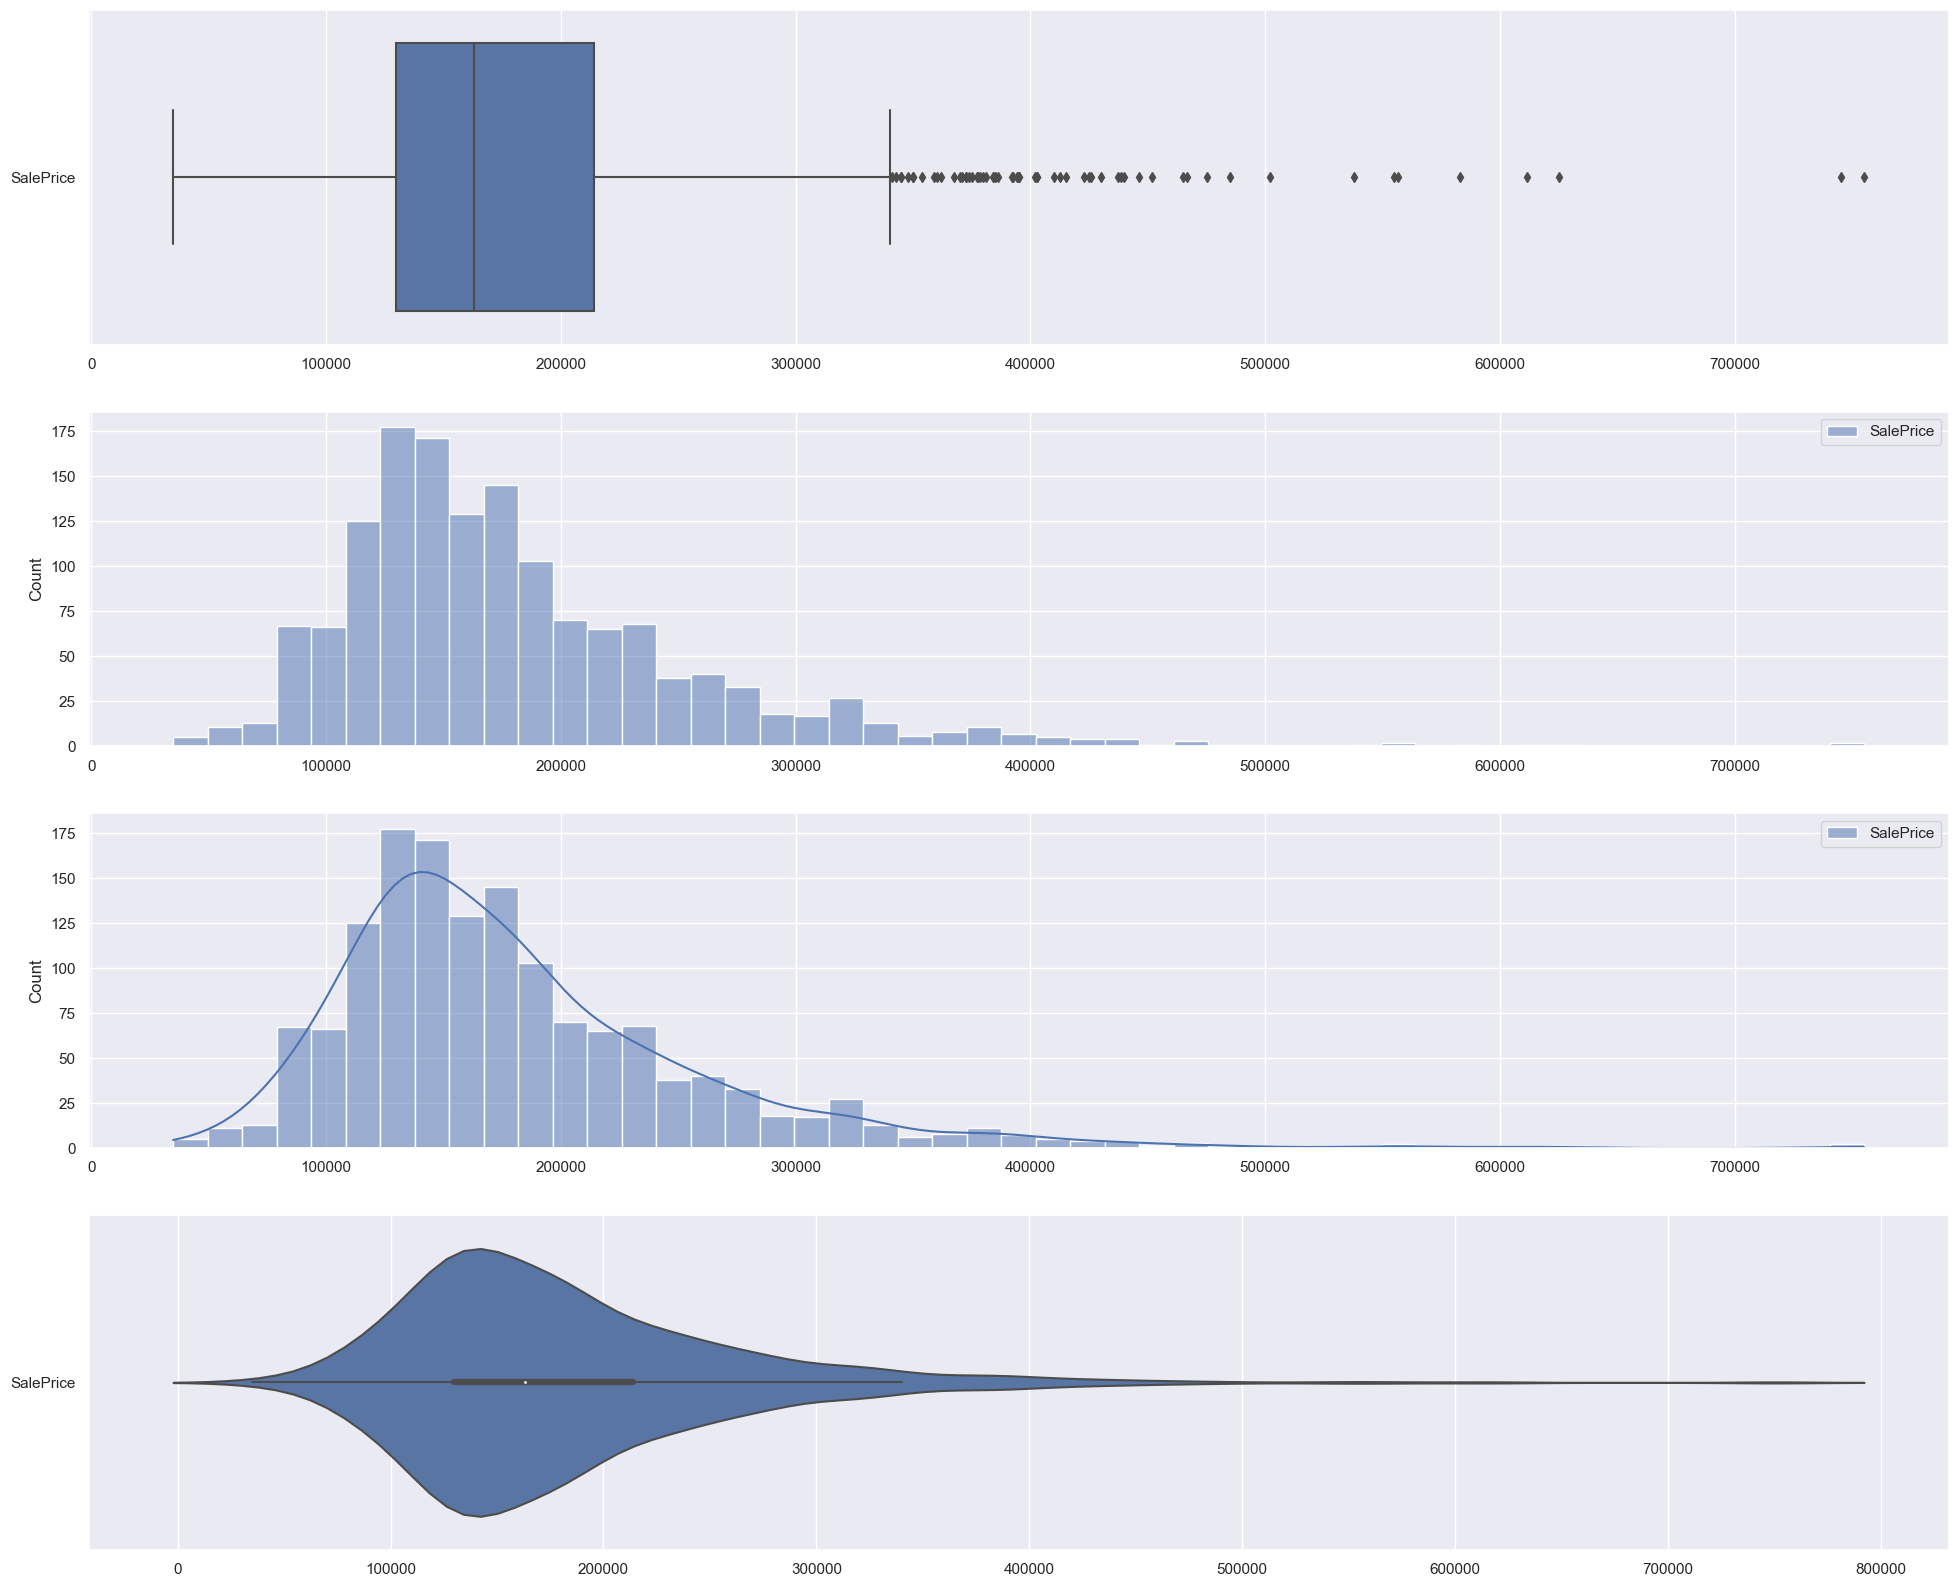

In [9]:
#question 2b
f, axes = plt.subplots(4, 1, figsize=(24,20))
sb.boxplot(data = sp, orient = 'h', ax = axes[0])
sb.histplot(data = sp, ax = axes[1])
sb.histplot(data = sp, kde = True, ax = axes[2])
sb.violinplot(data = sp, orient = 'h', ax = axes[3])

In [10]:
#question 2c
la.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


<AxesSubplot:>

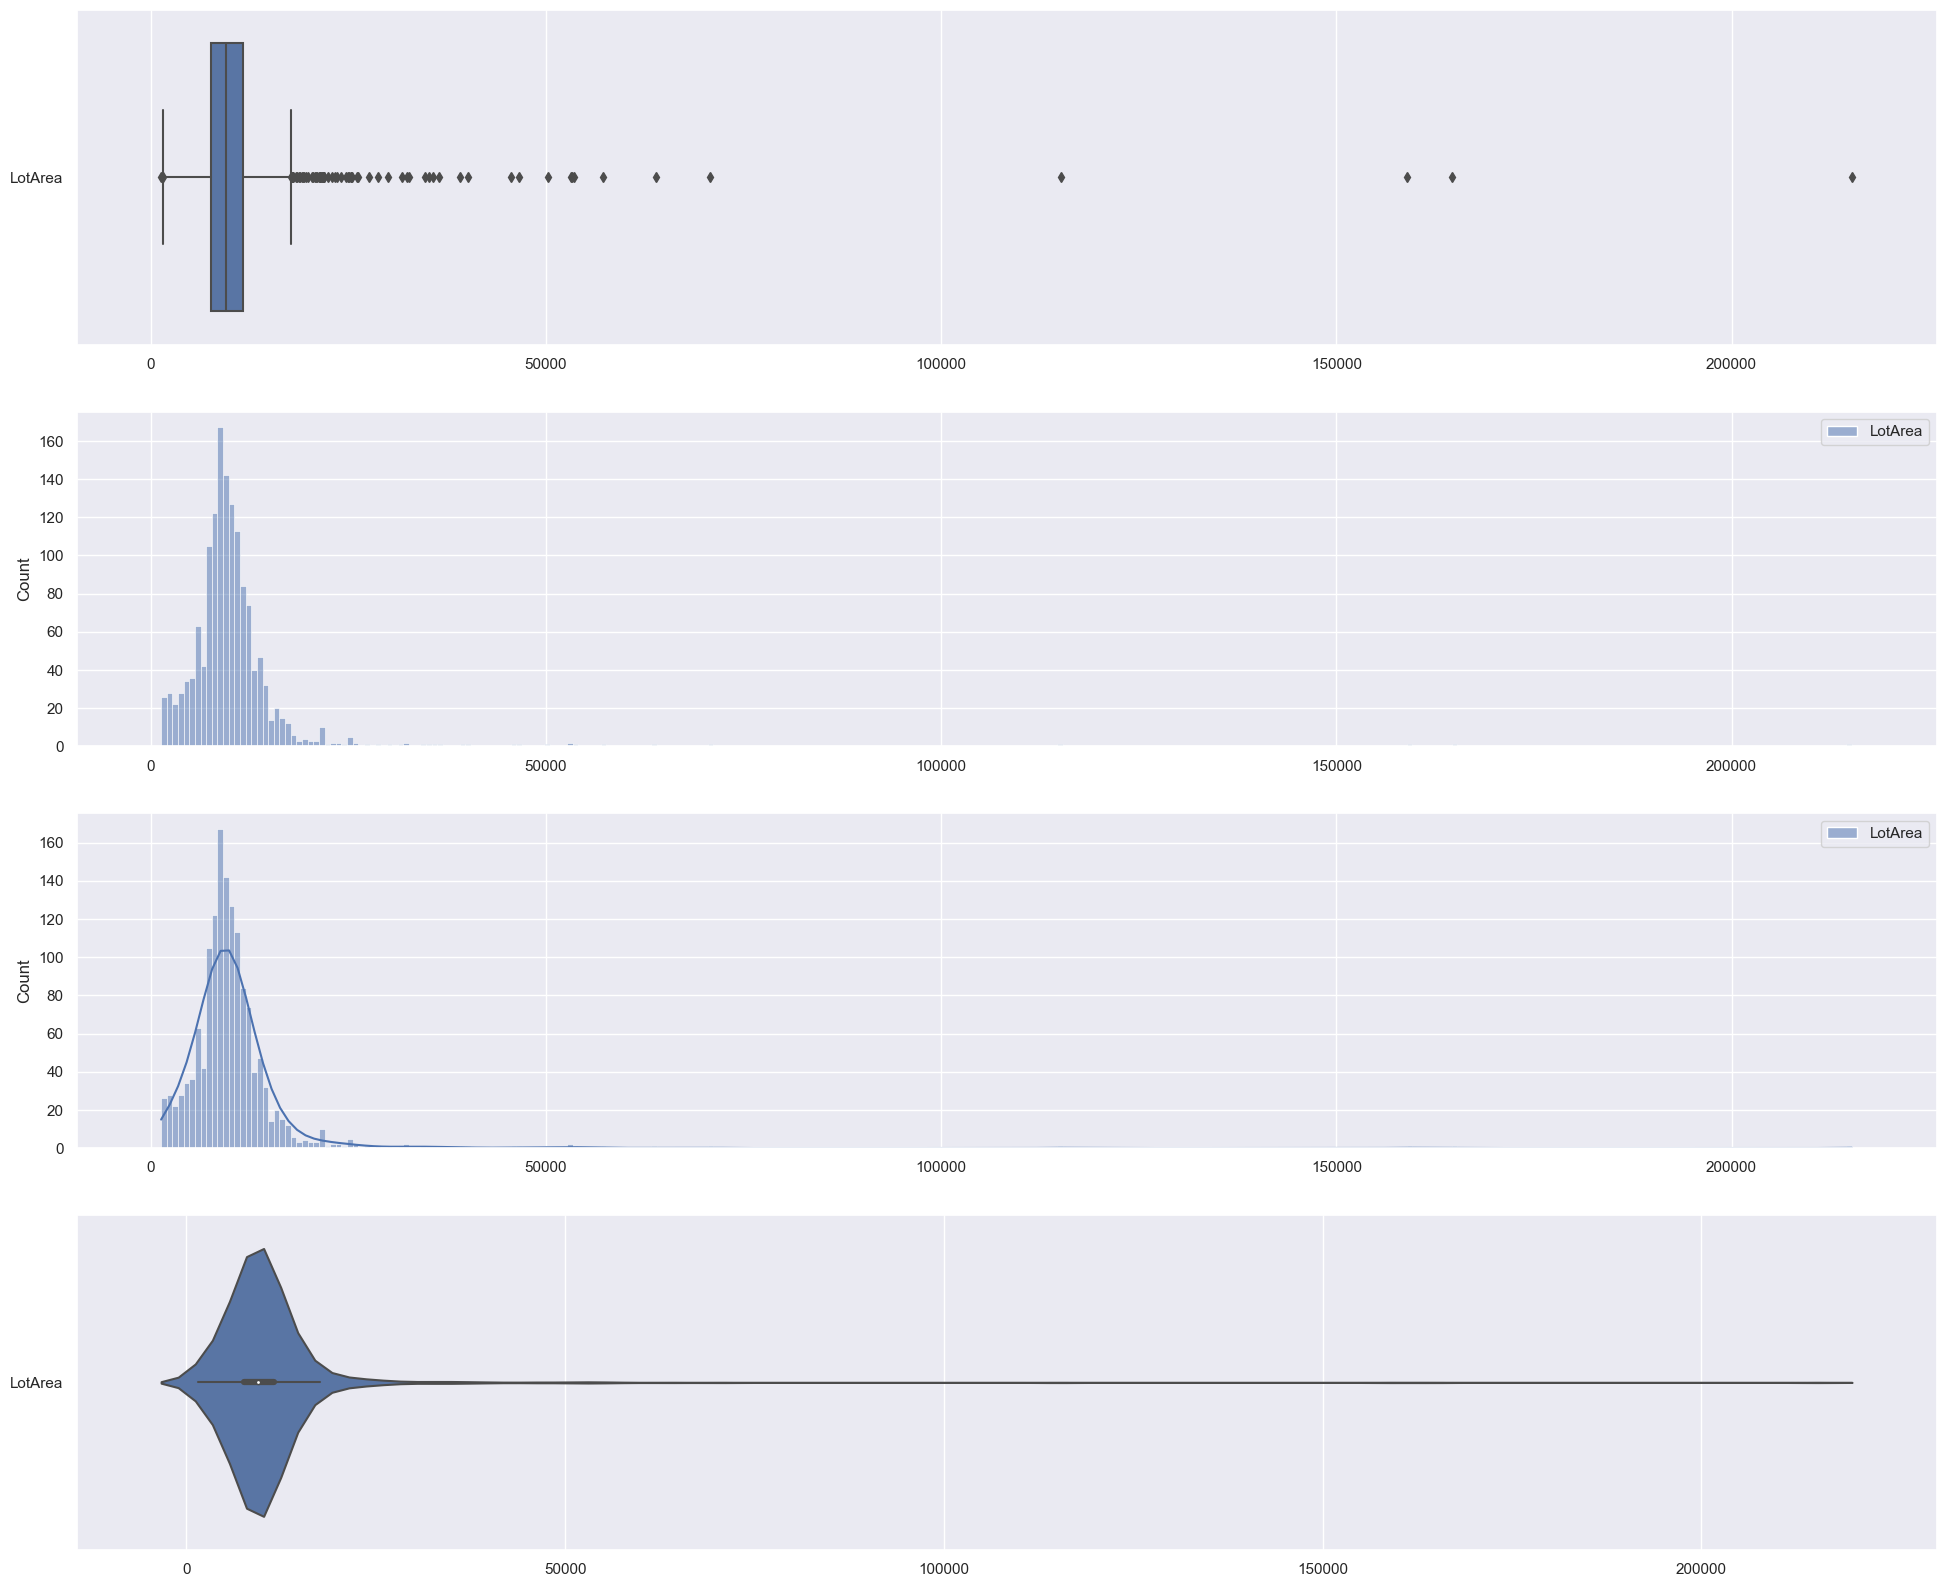

In [11]:
#question 2d
f, axes = plt.subplots(4, 1, figsize=(24,20))
sb.boxplot(data = la, orient = 'h', ax = axes[0])
sb.histplot(data = la, ax = axes[1])
sb.histplot(data = la, kde = True, ax = axes[2])
sb.violinplot(data = la, orient = 'h', ax = axes[3])

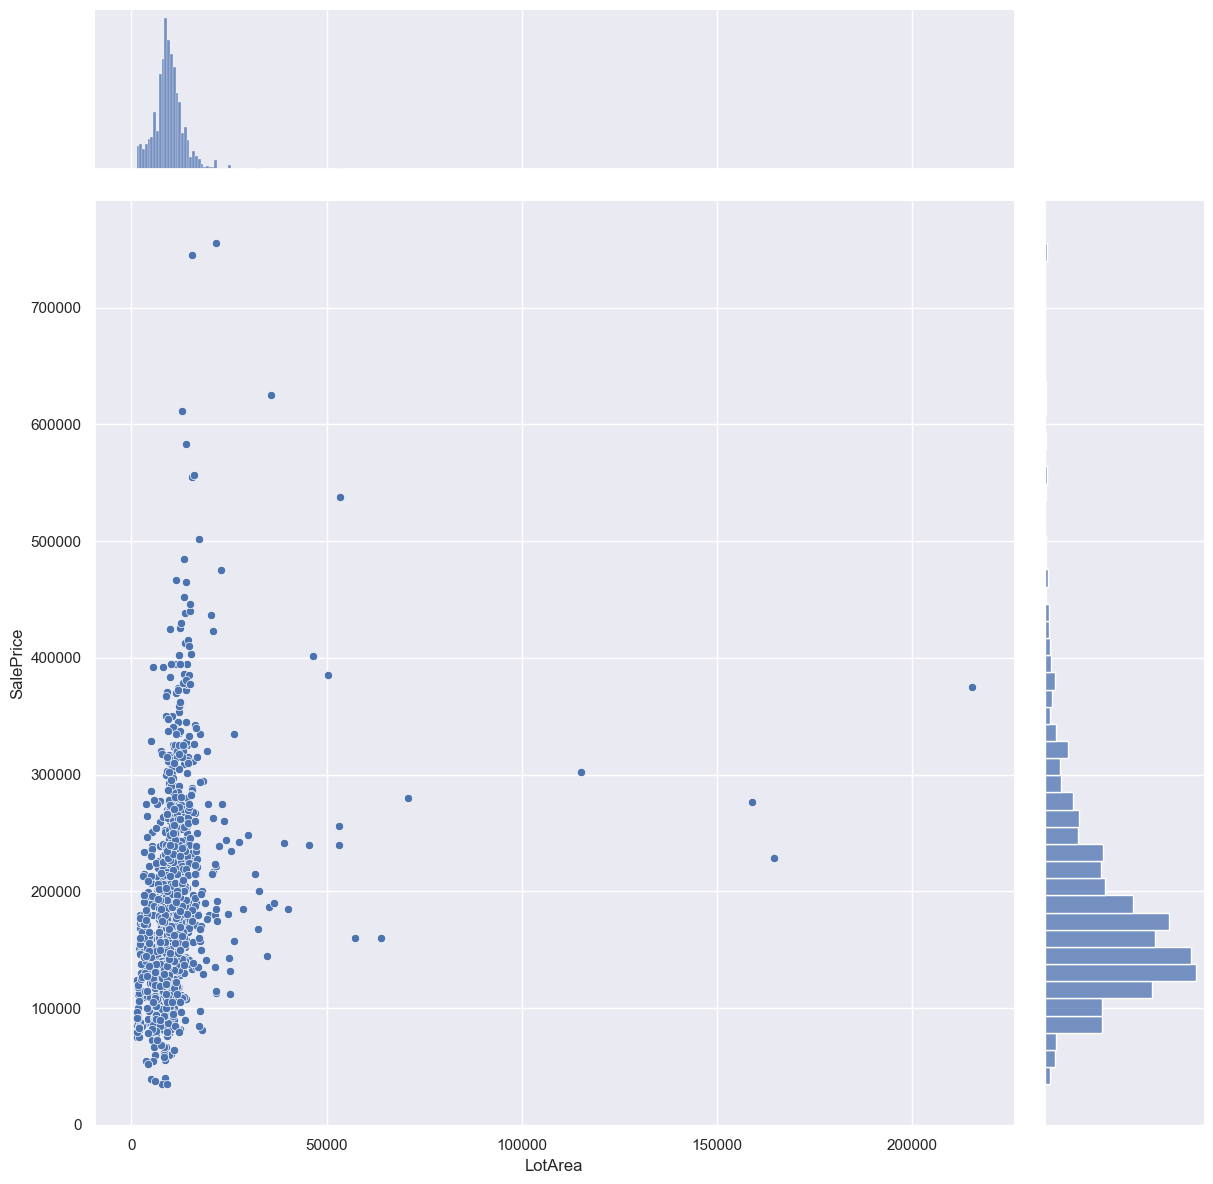

In [12]:
#question 2e
jointDf = pd.concat([sp, la], axis = 1).reindex(sp.index)
sb.jointplot(data = jointDf, x = "LotArea", y = "SalePrice", height = 12)

In [13]:
#Bonus Question

trains = pd.DataFrame(train[train.select_dtypes(include = ['int64', 'float64']).columns])
trains

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [14]:
clean_trains = trains.copy()
clean_trains = clean_trains.drop(columns = ['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'])
clean_trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1452 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  BsmtFullBath   1460 non-null   int64  
 12  BsmtHalfBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  KitchenAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Fireplac

C:\Users\paier\anaconda3\lib\site-packages\seaborn\axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


ValueError: If using all scalar values, you must pass an index

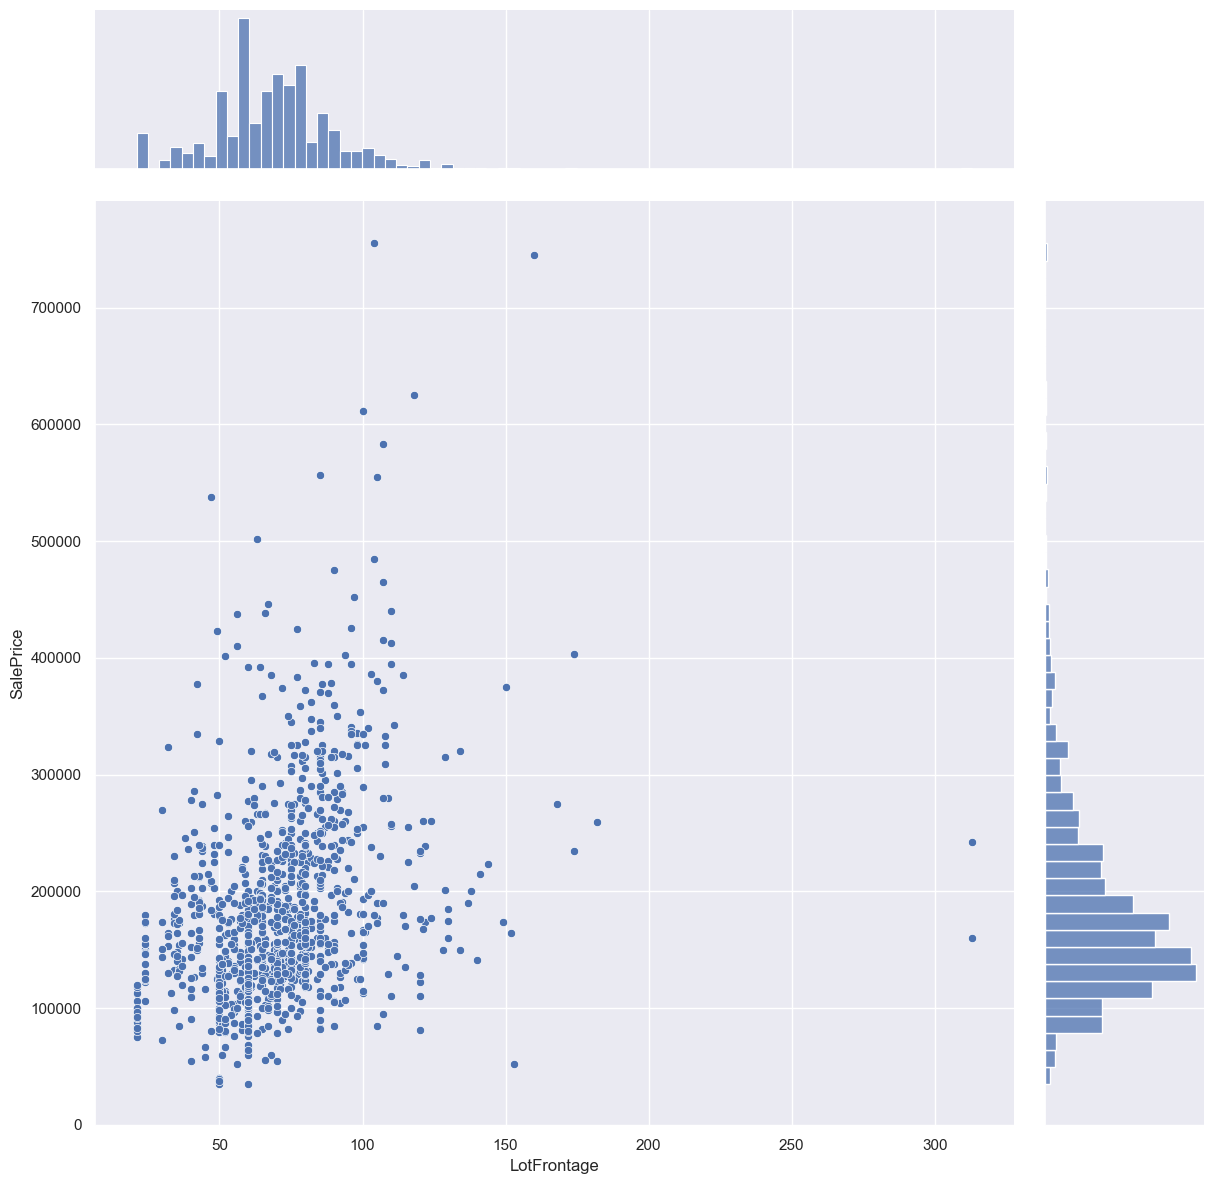

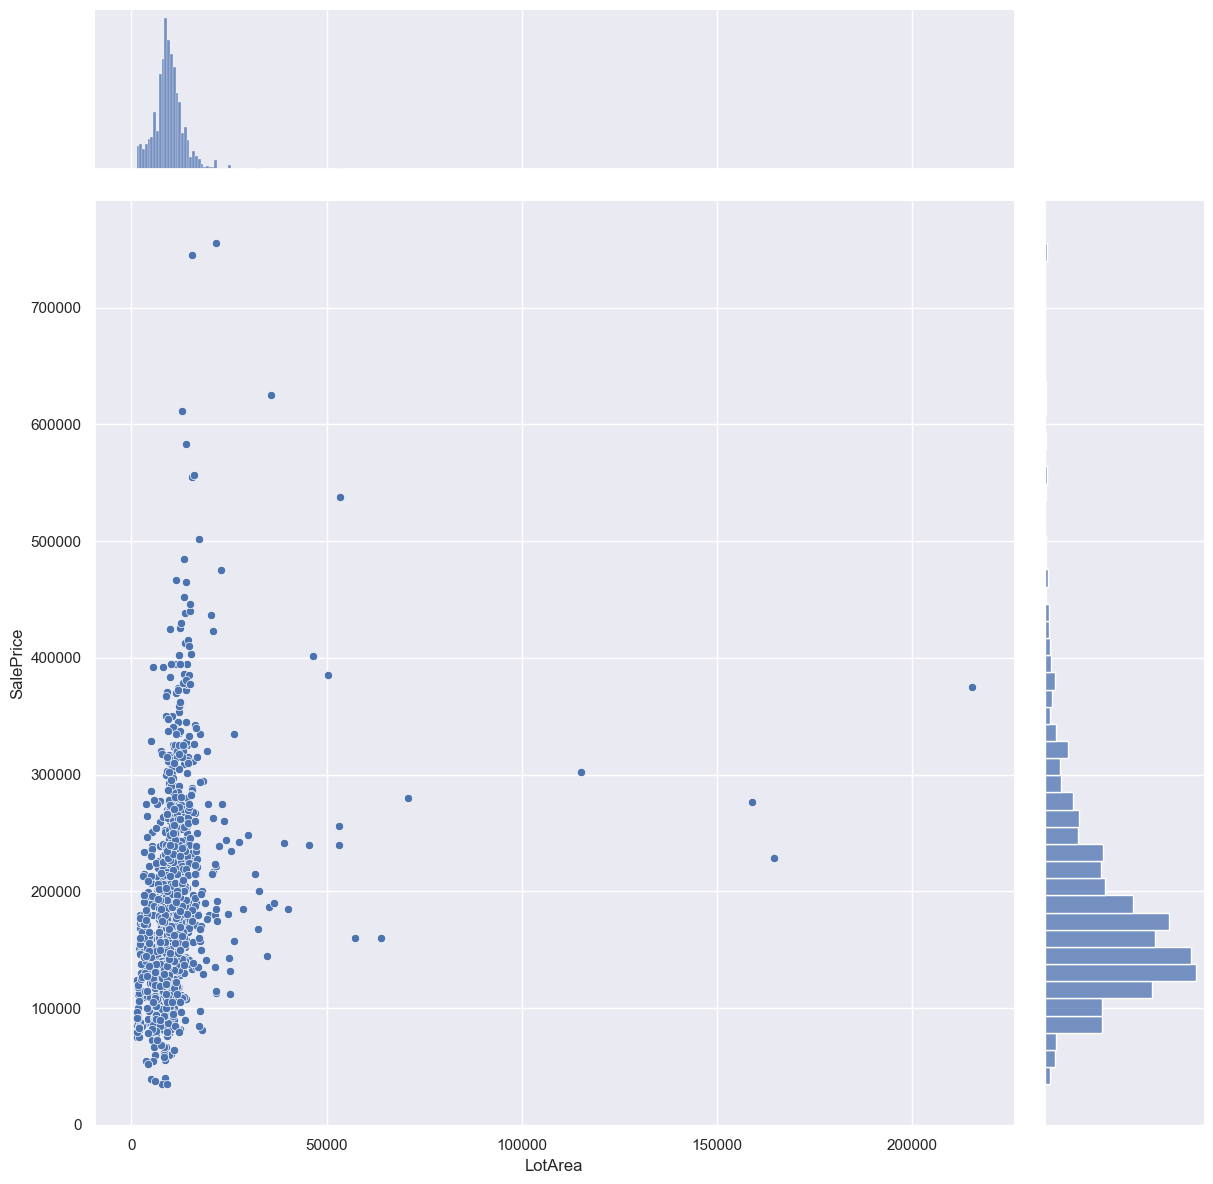

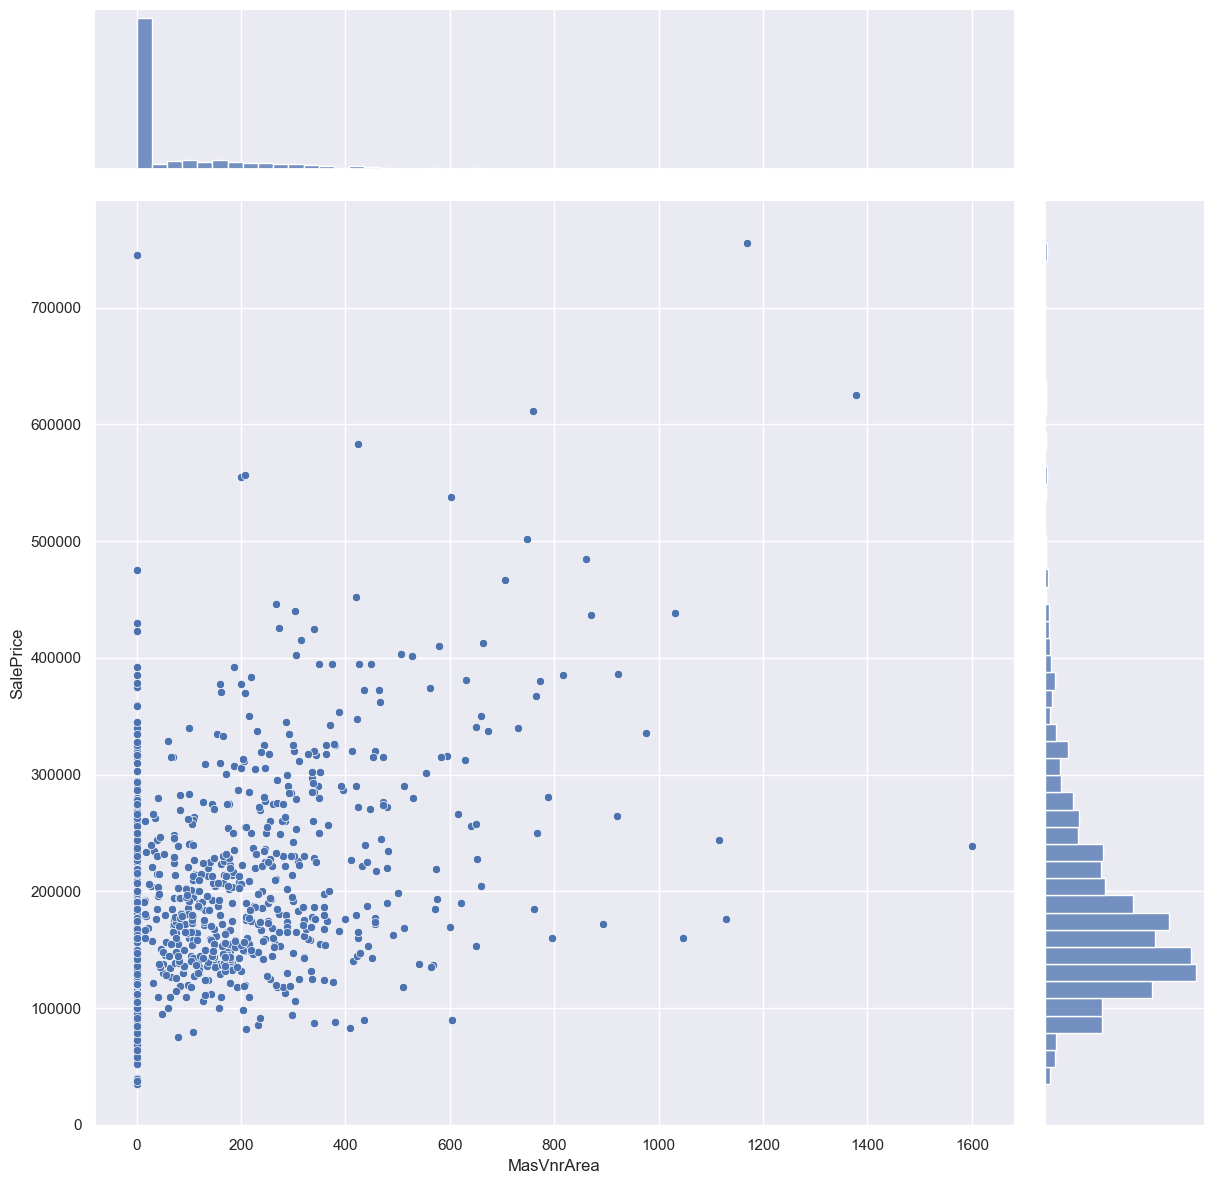

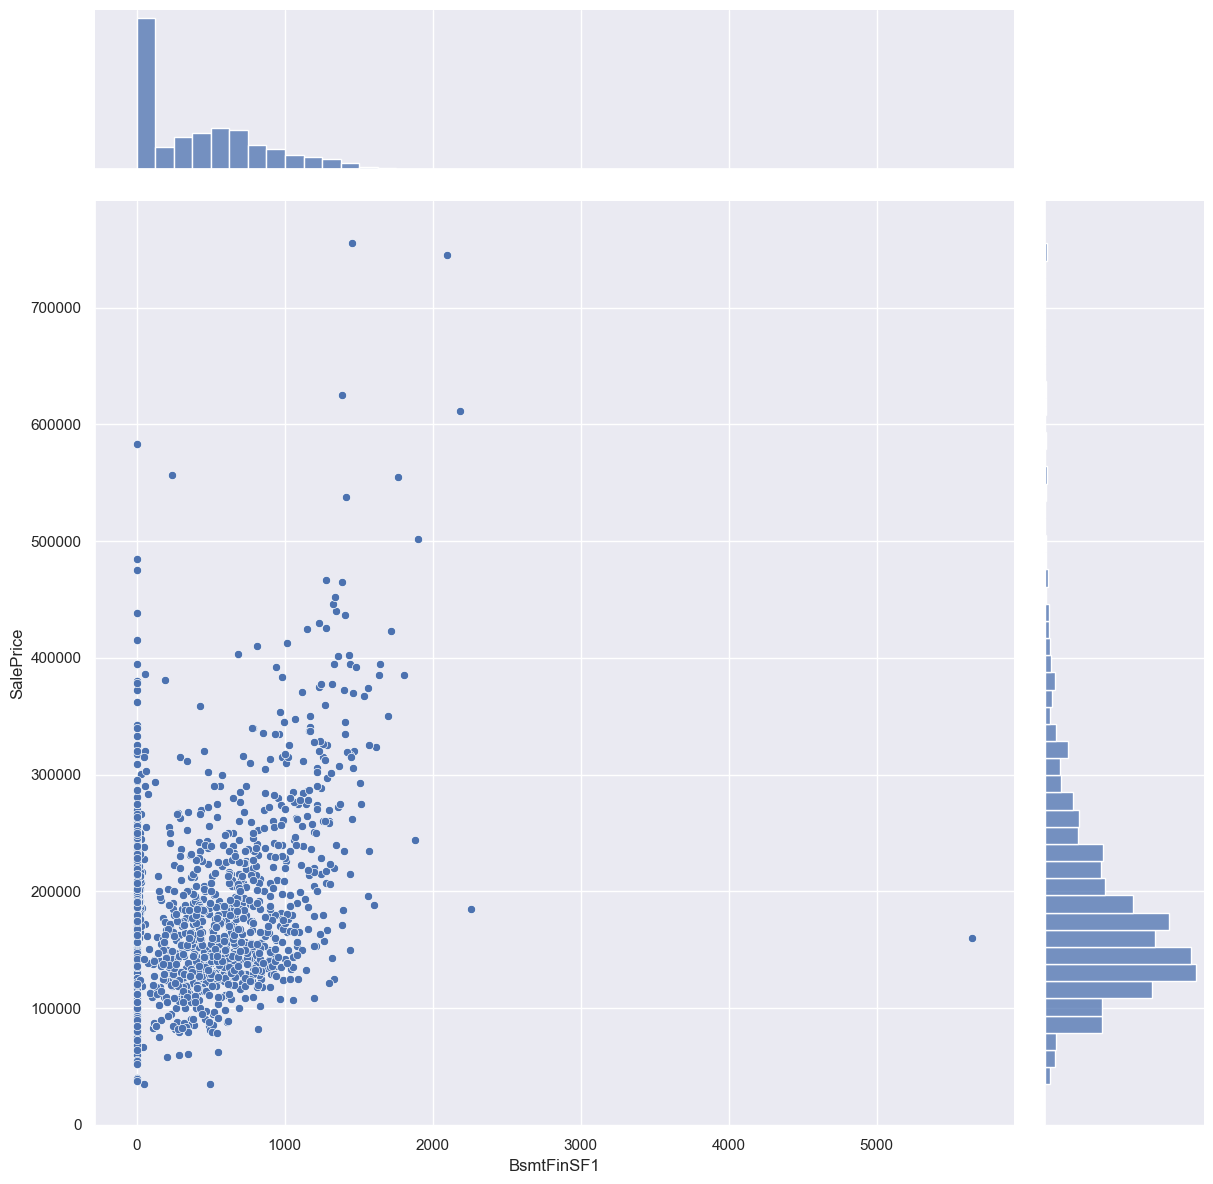

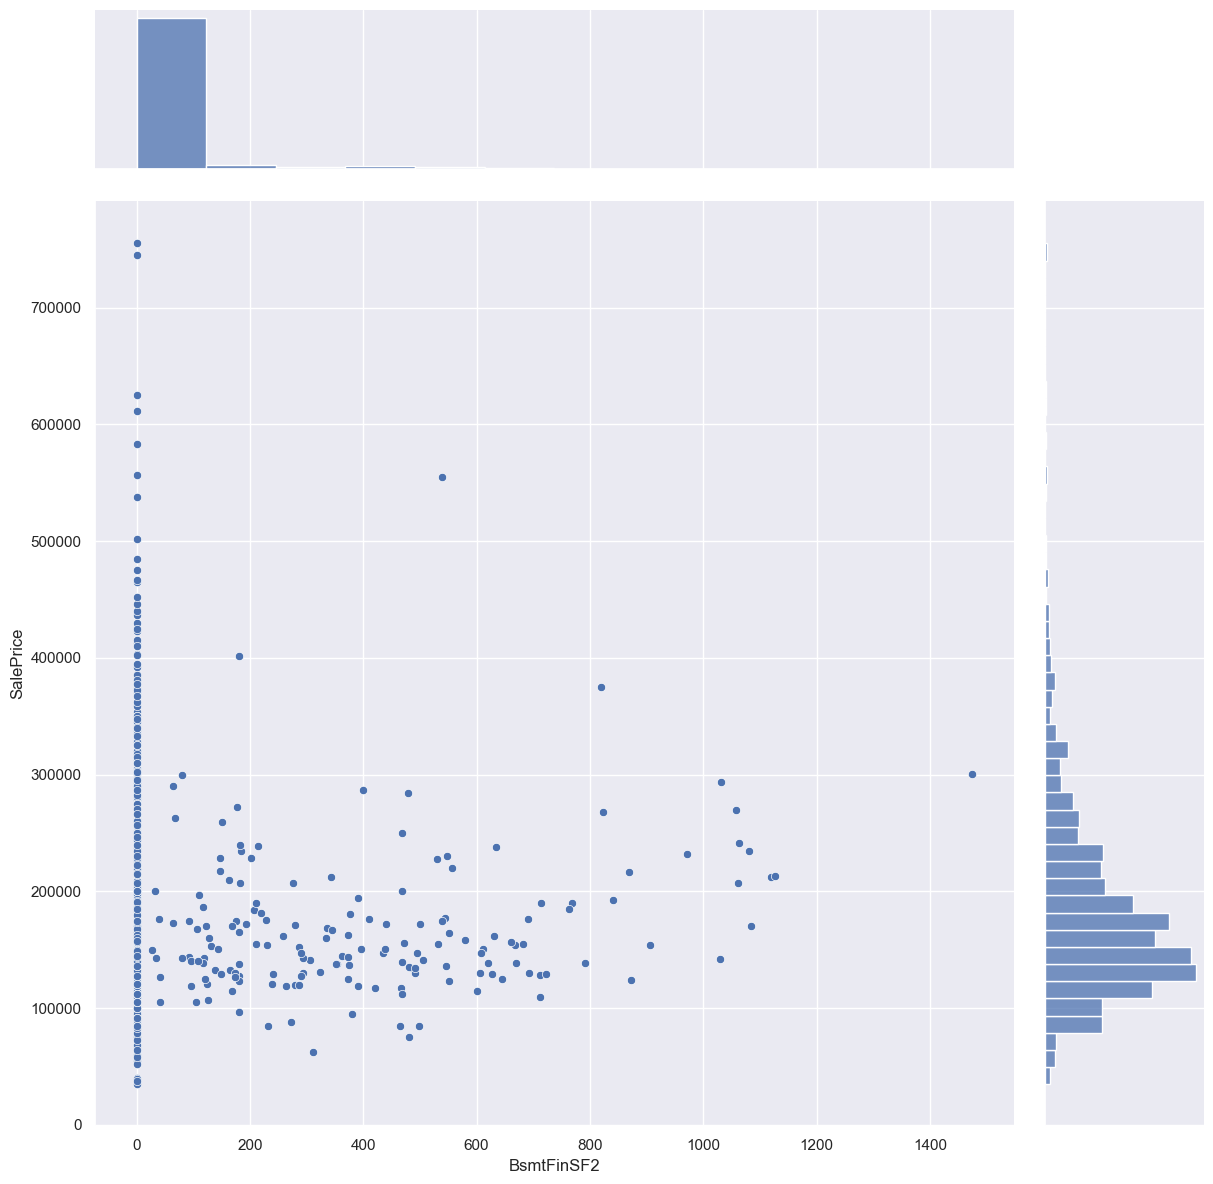

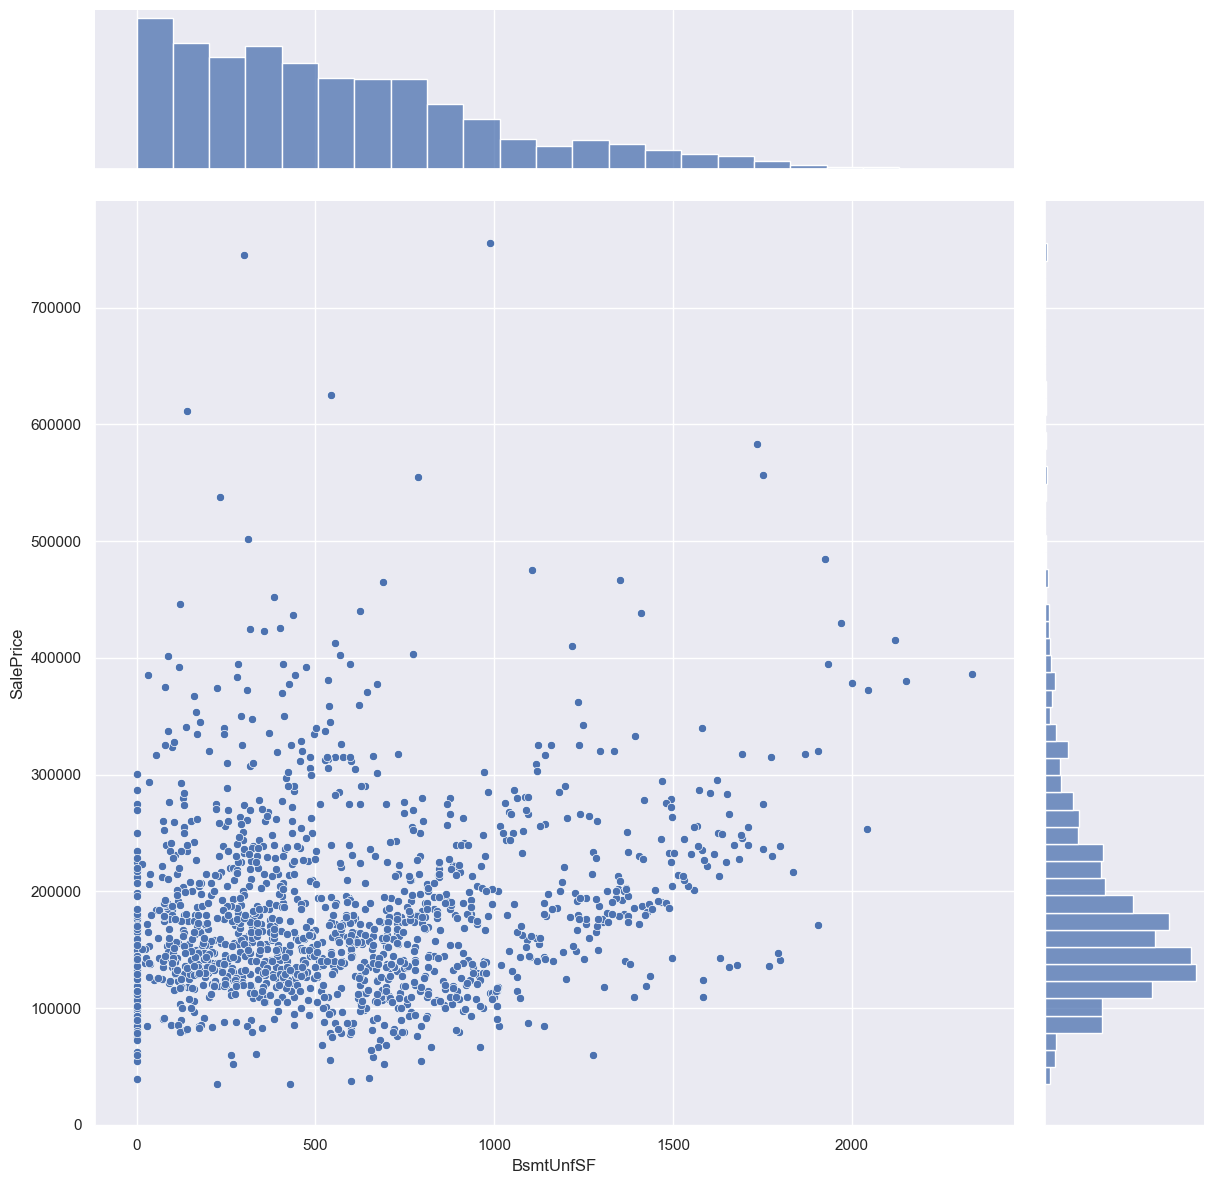

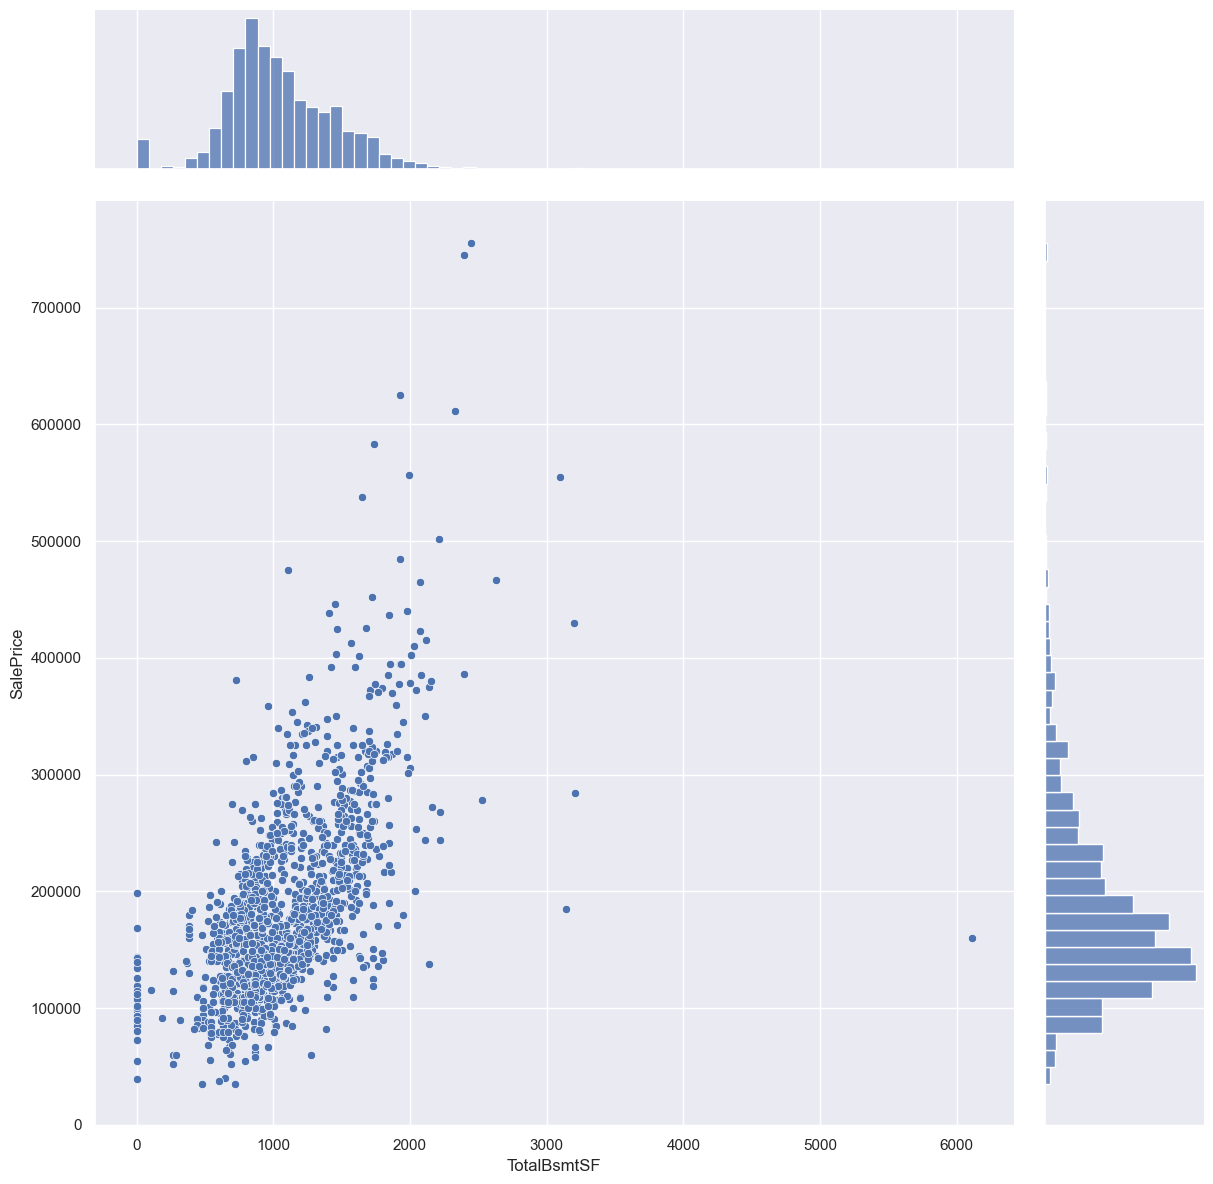

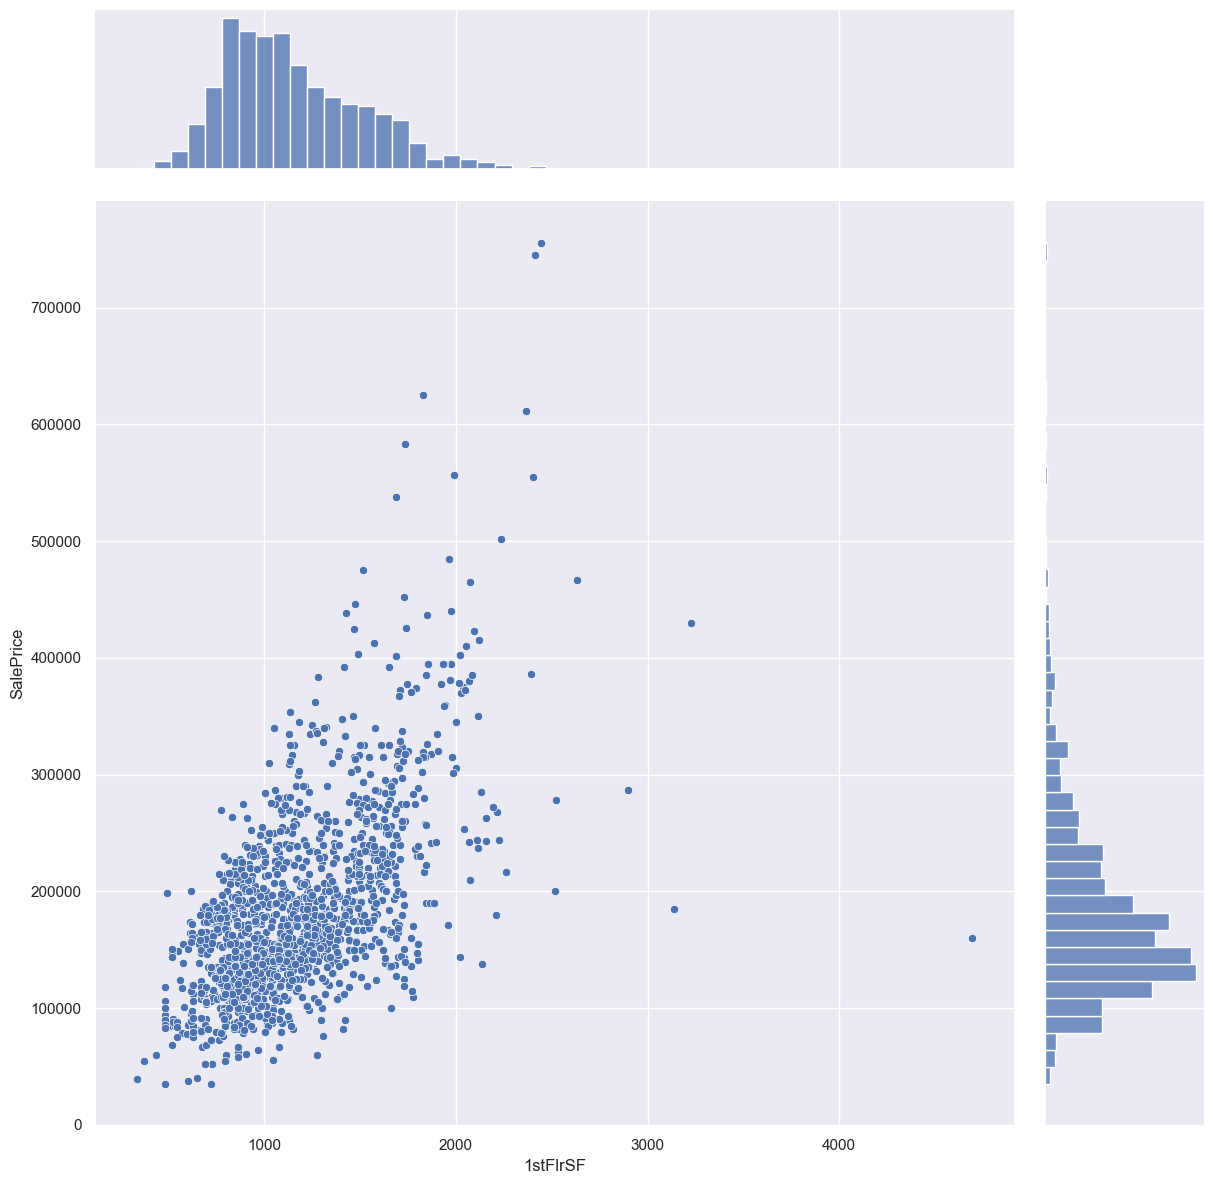

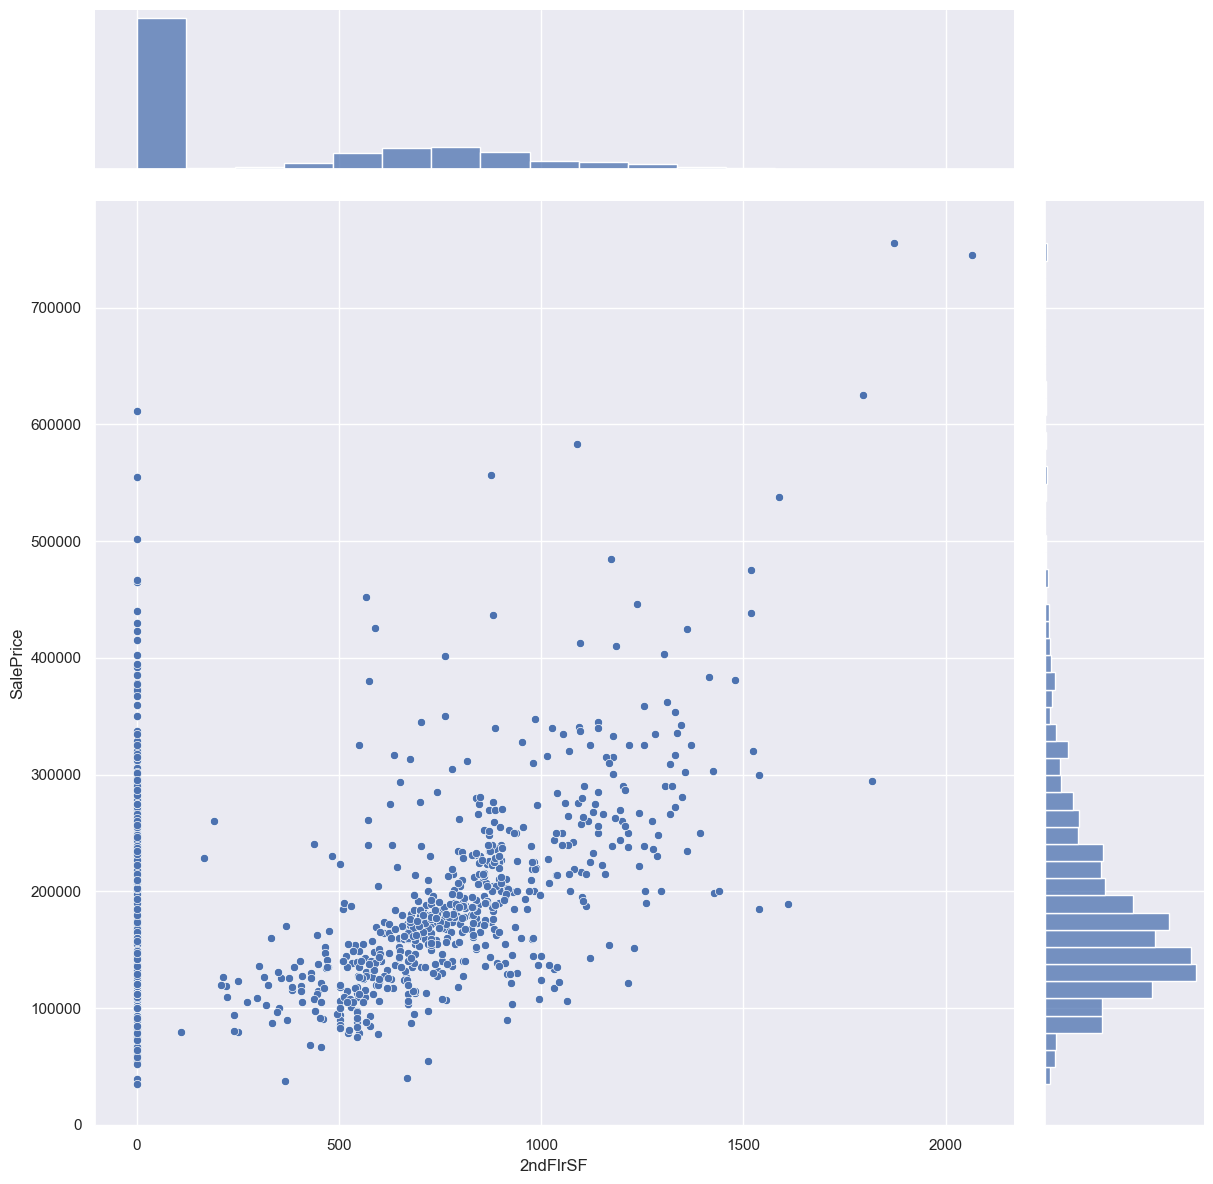

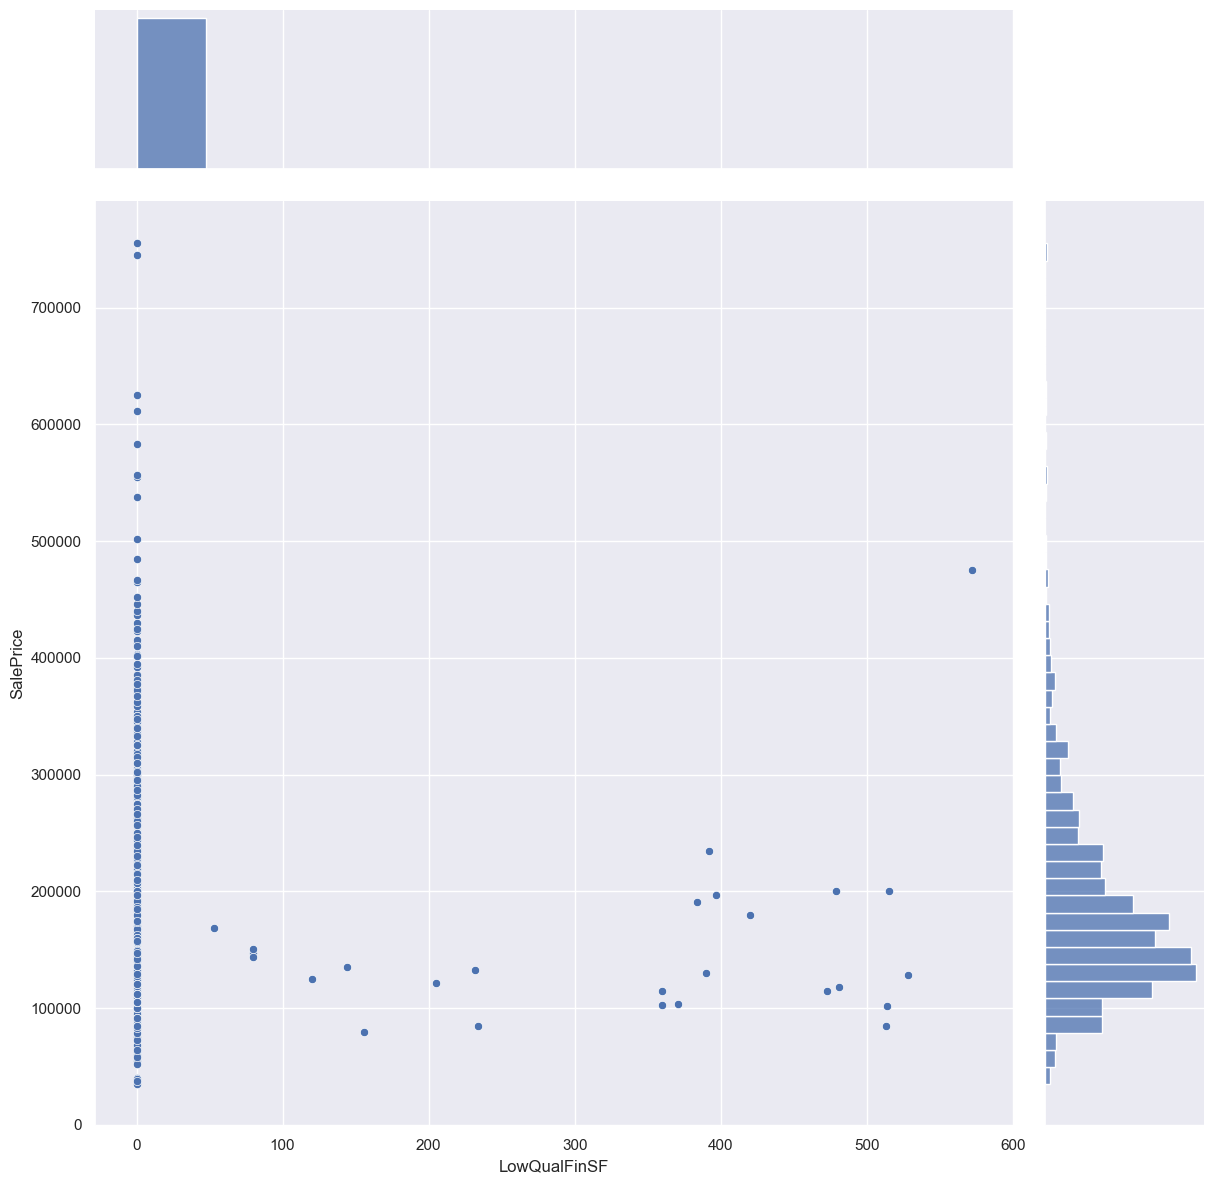

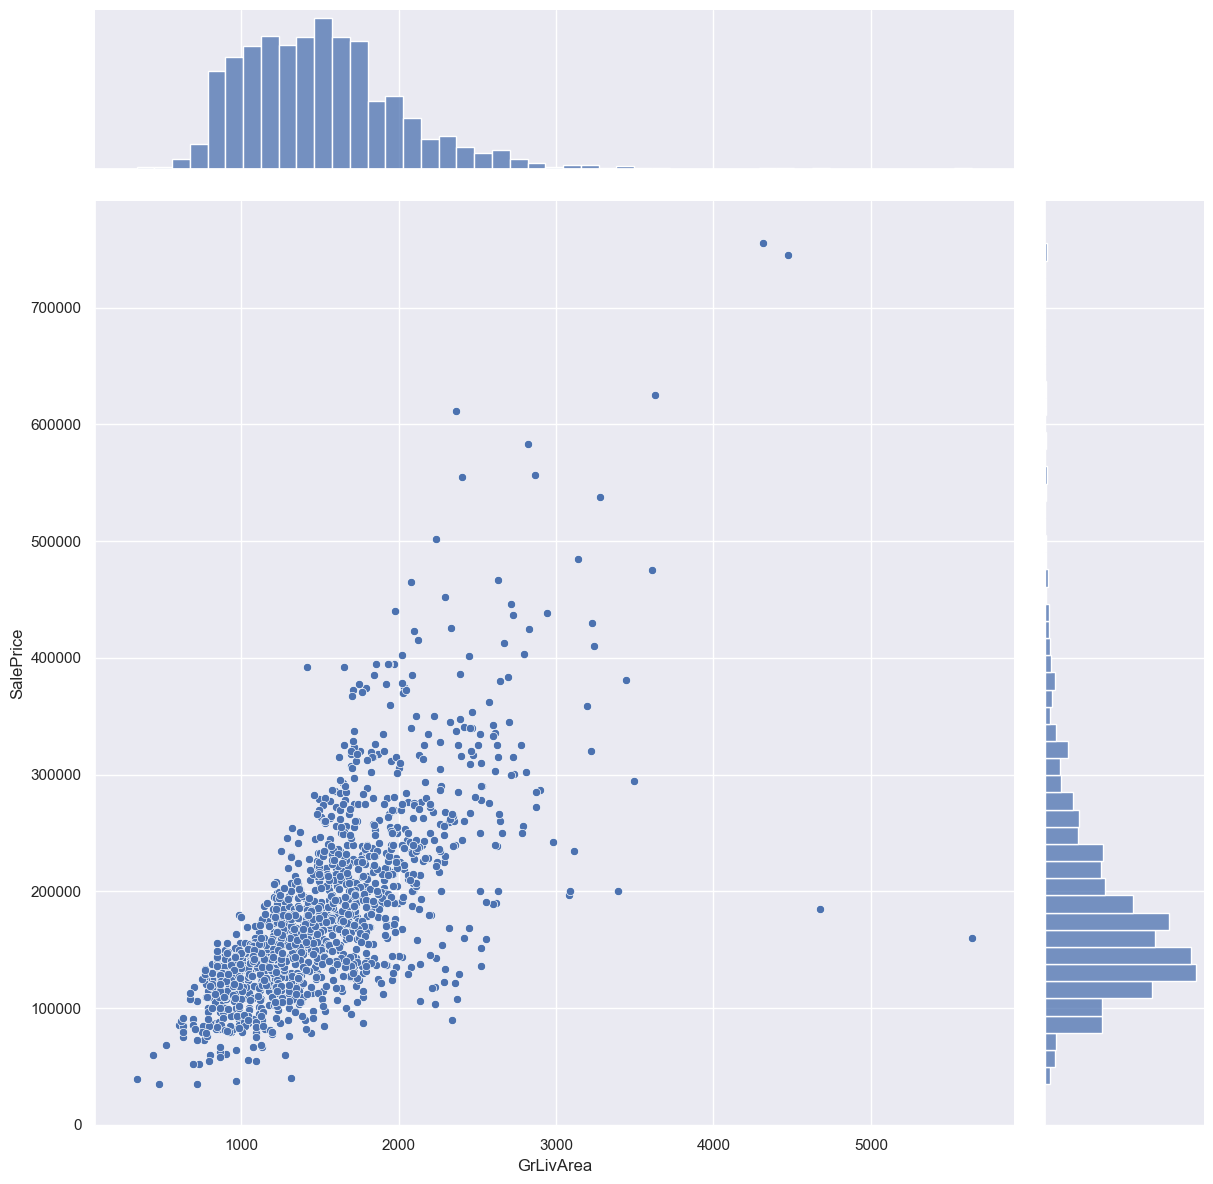

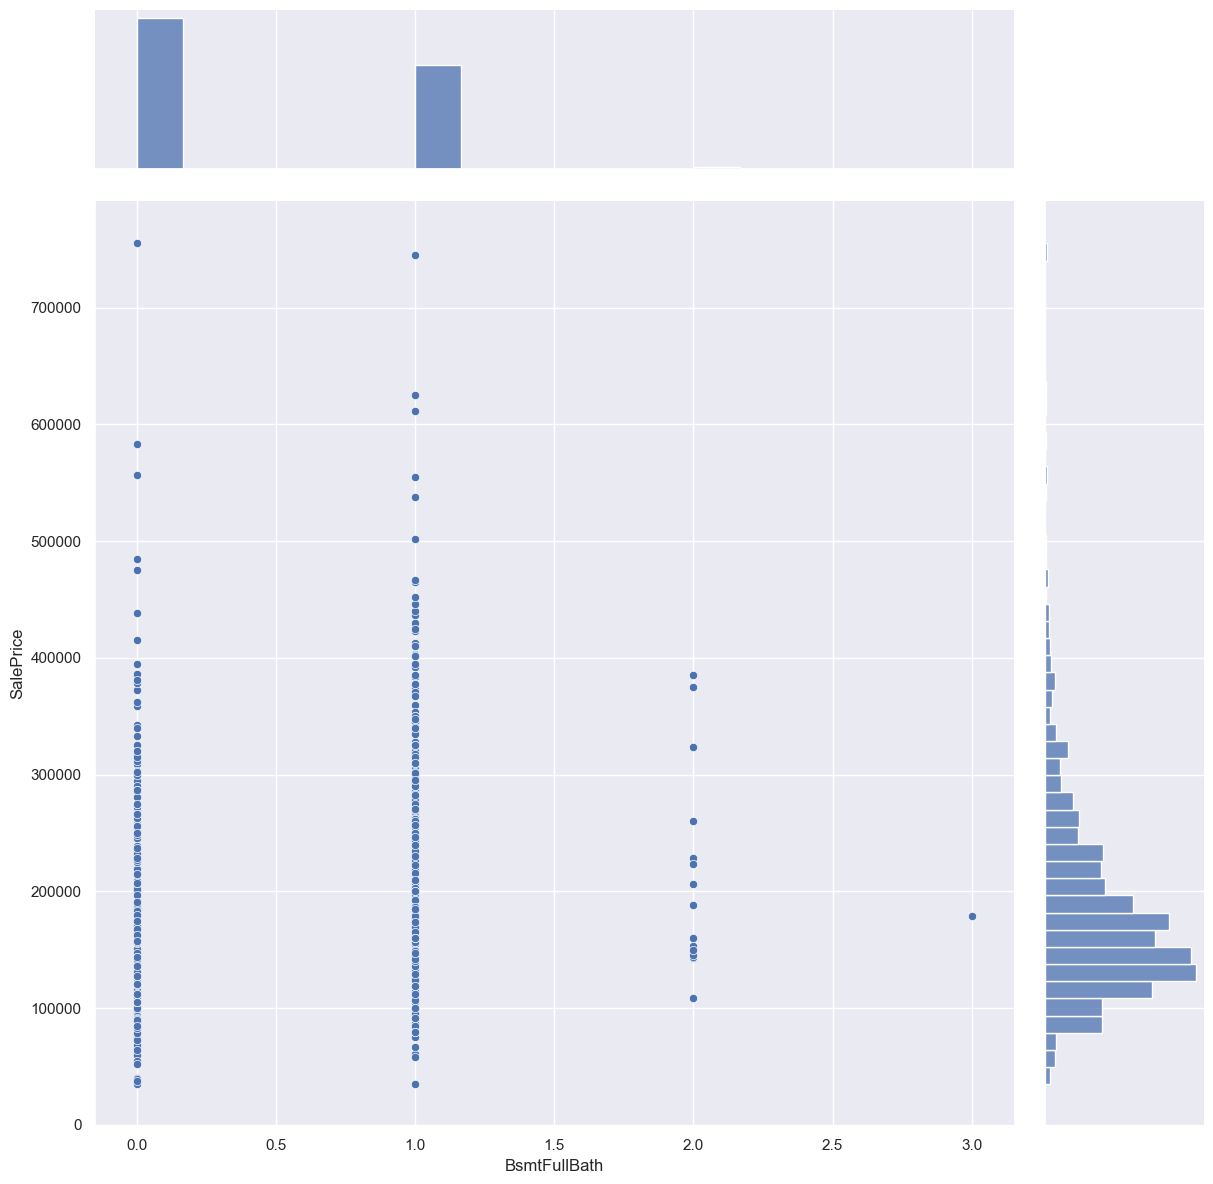

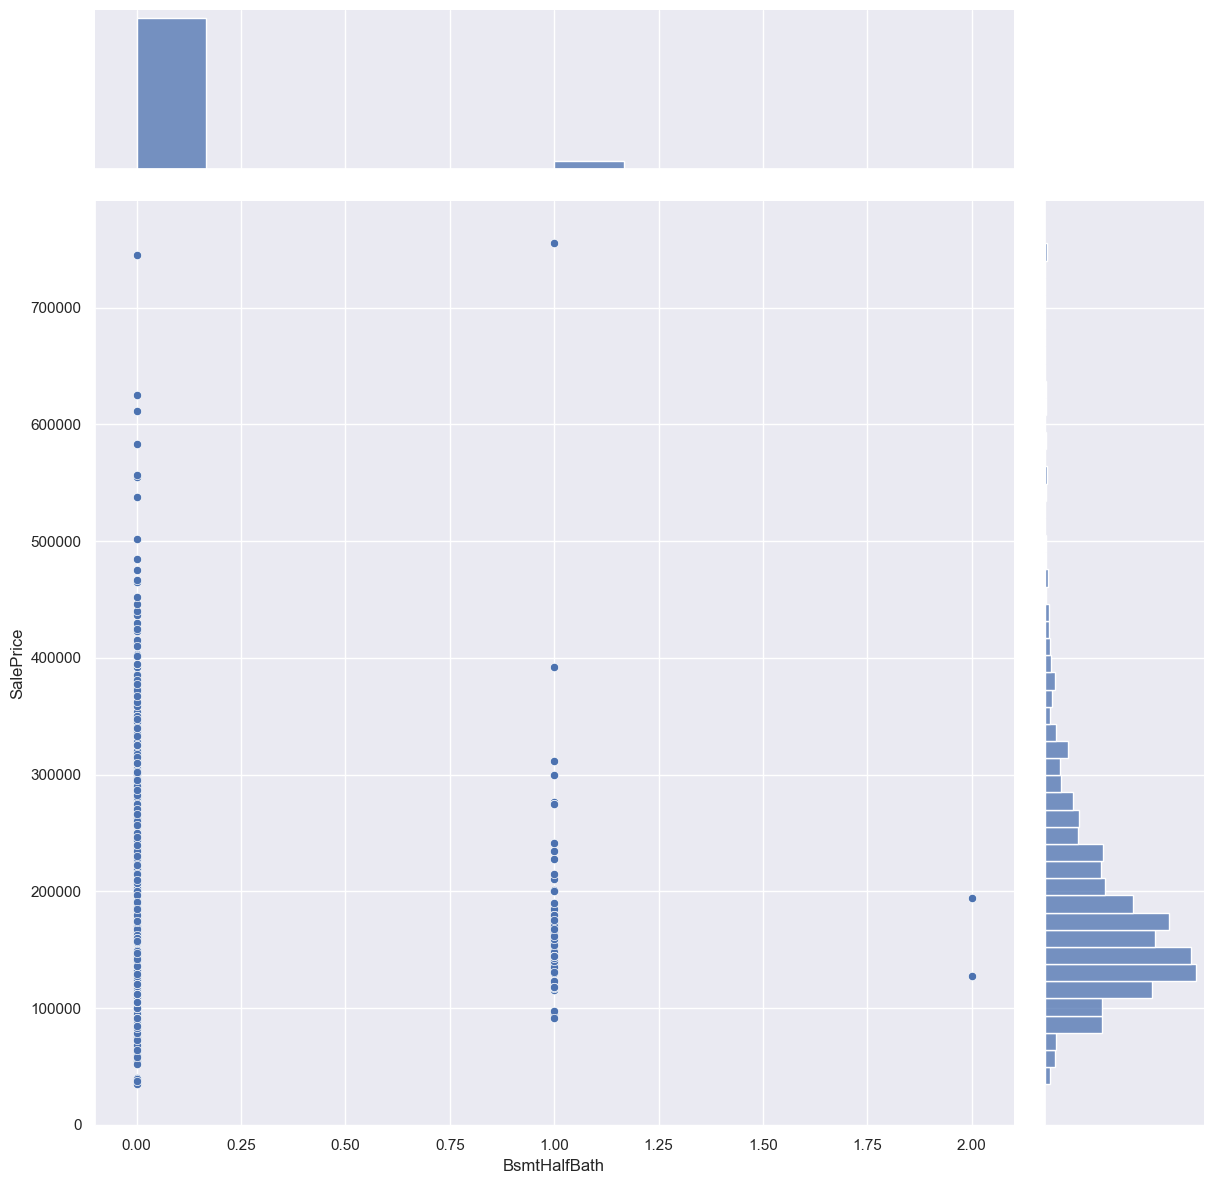

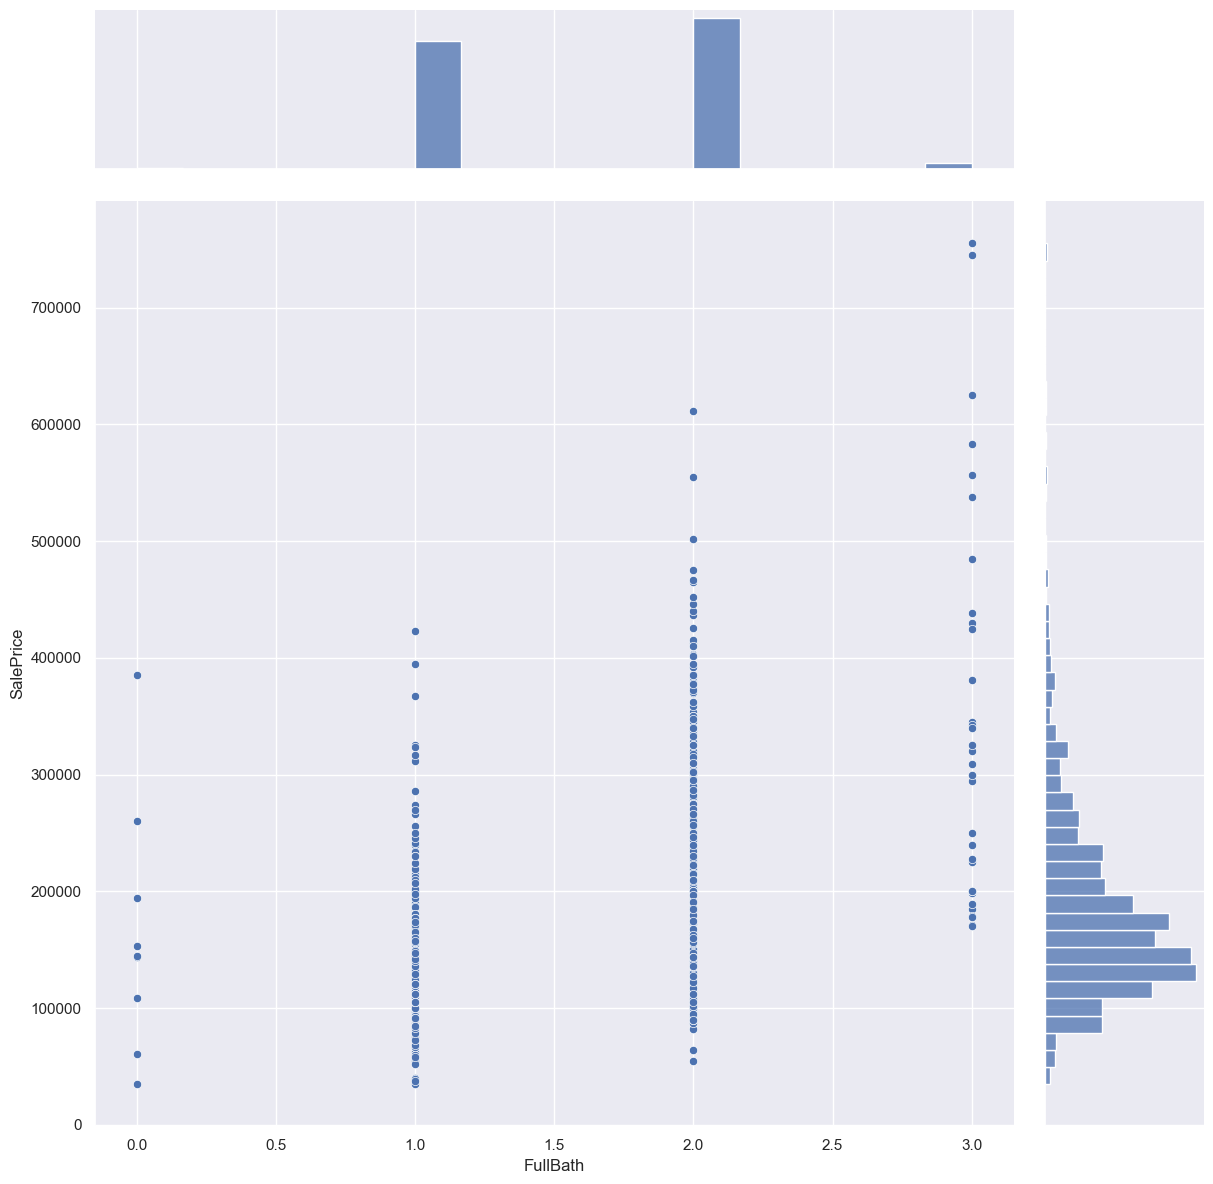

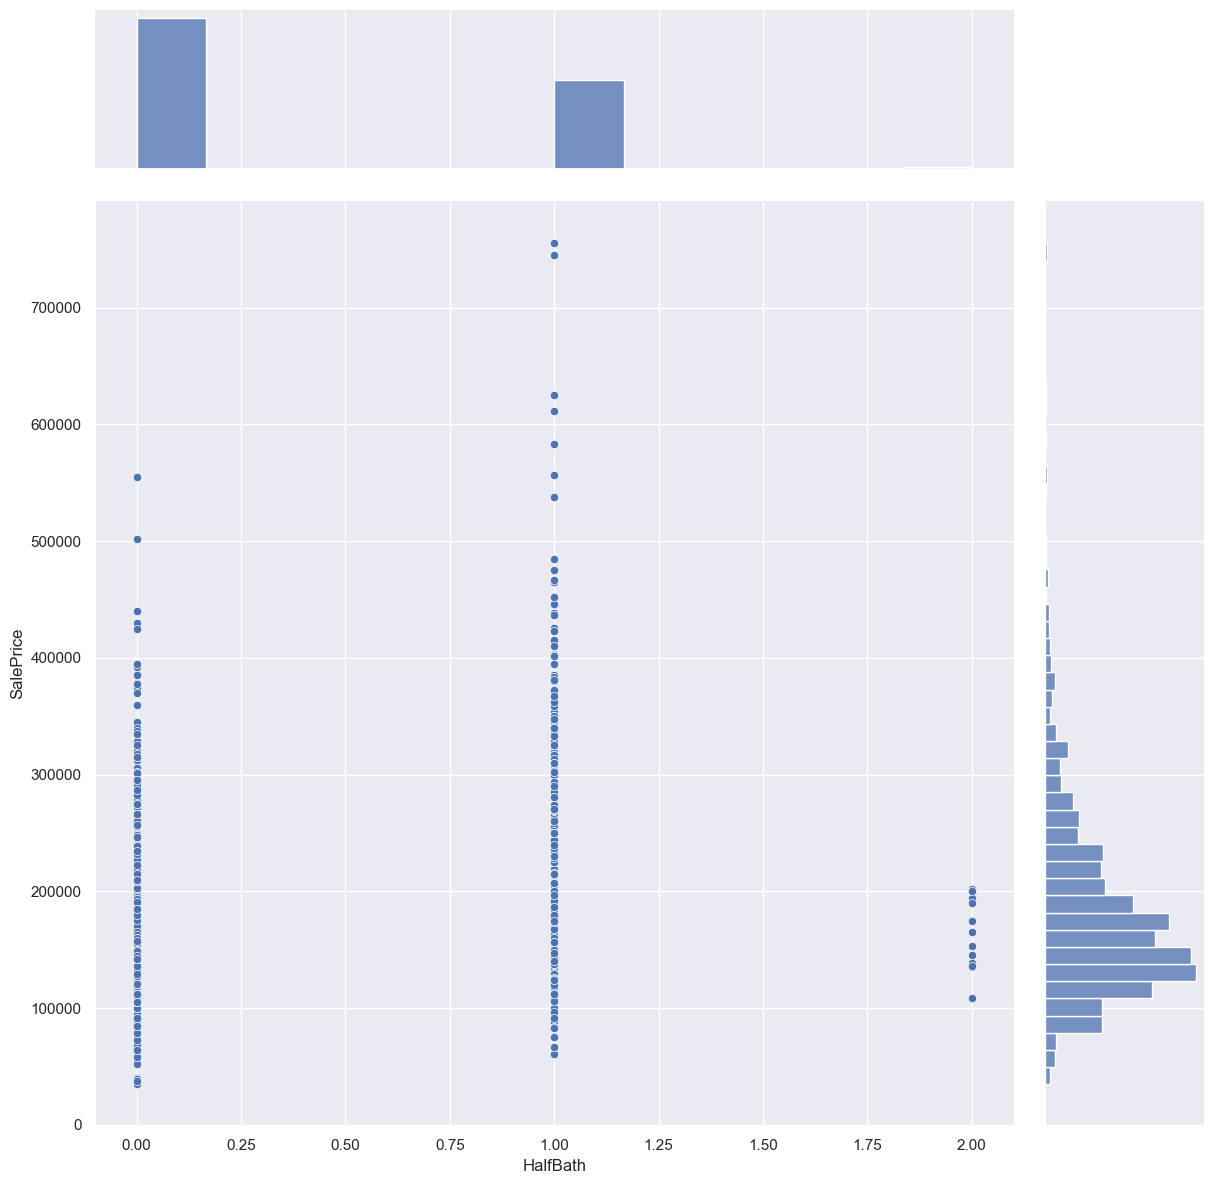

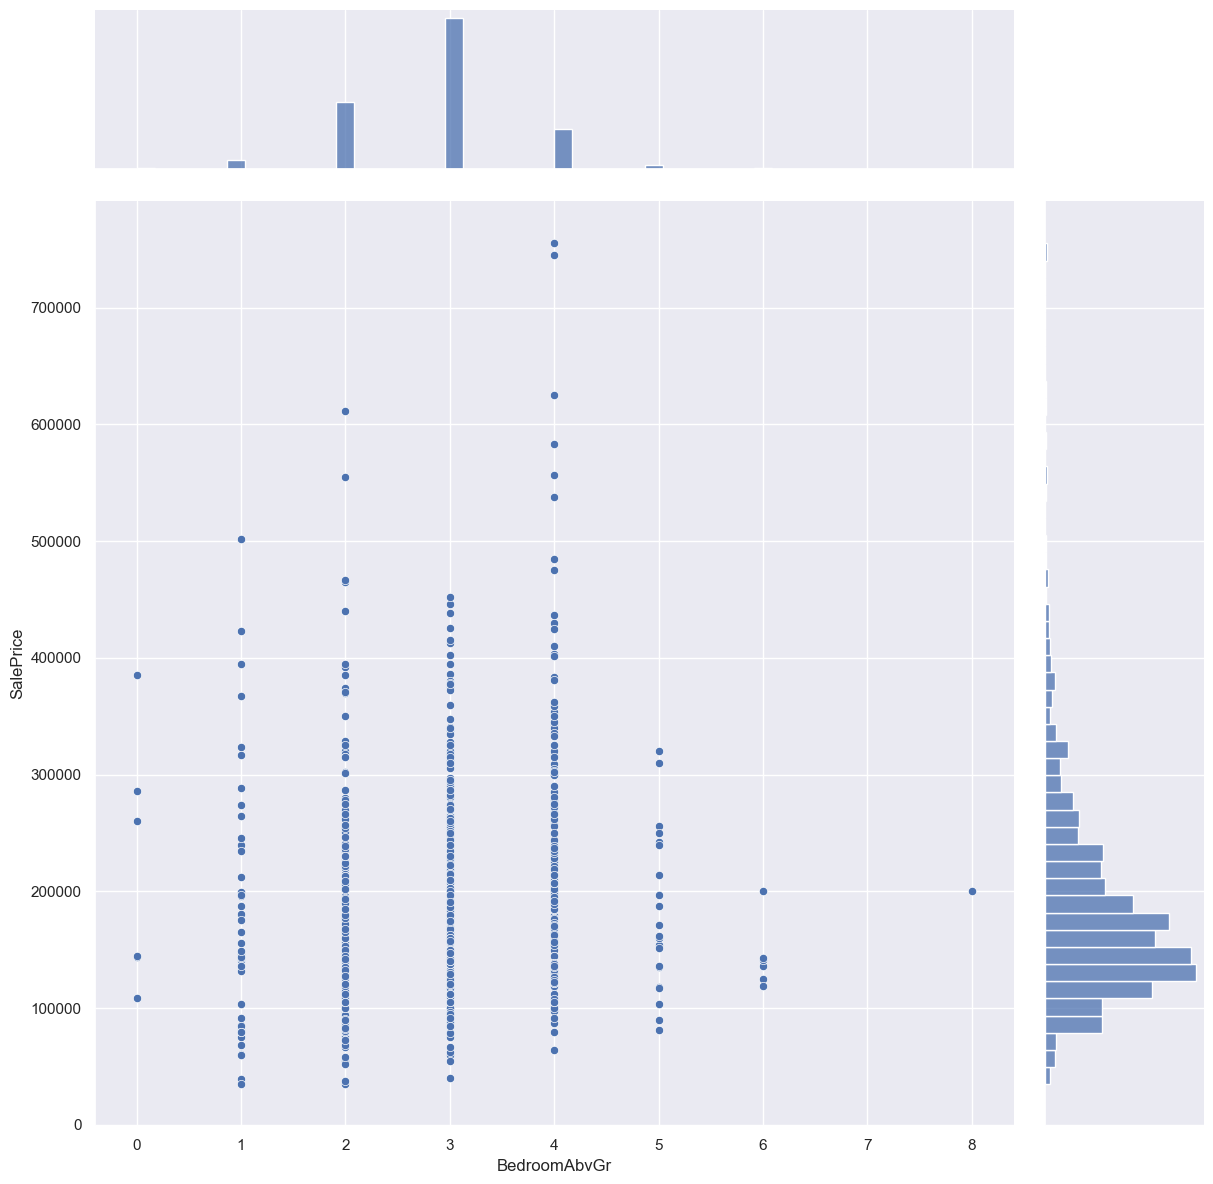

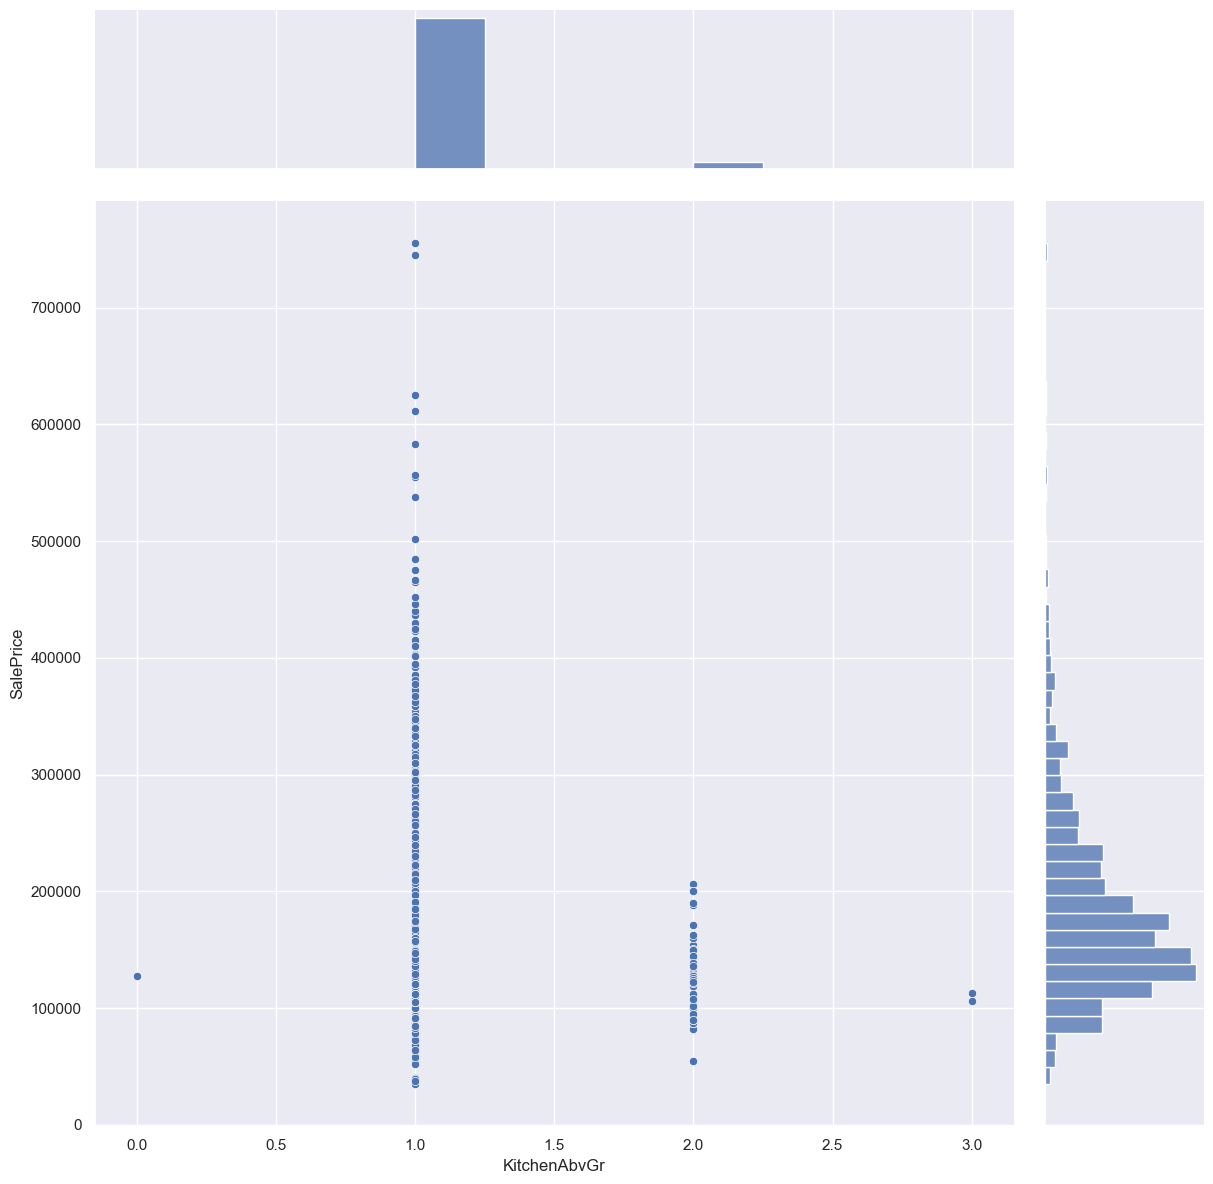

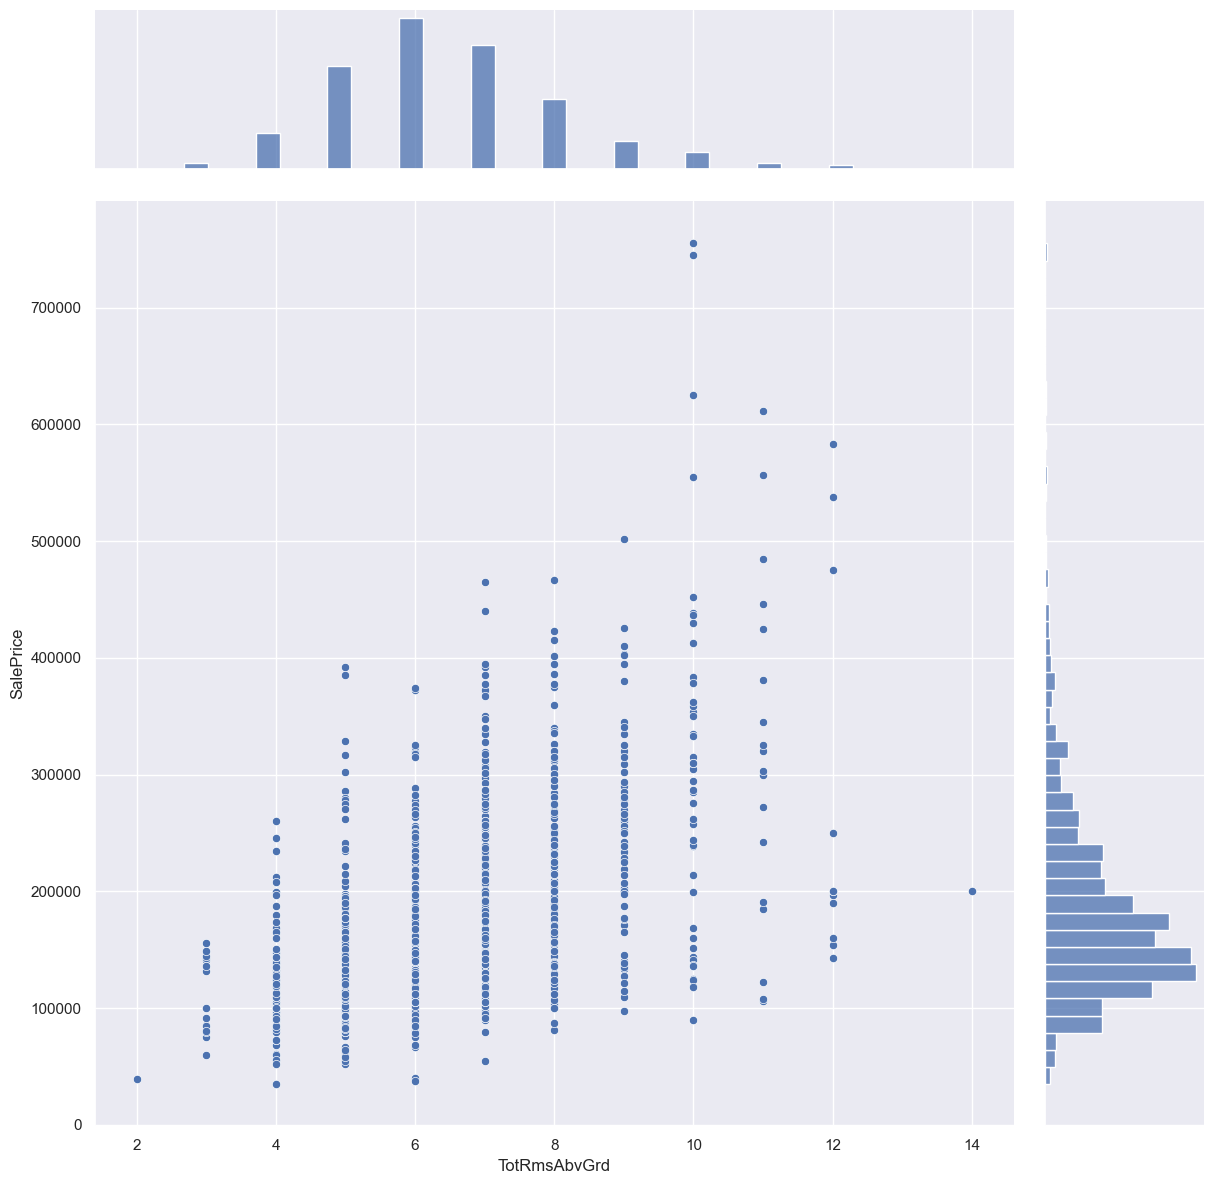

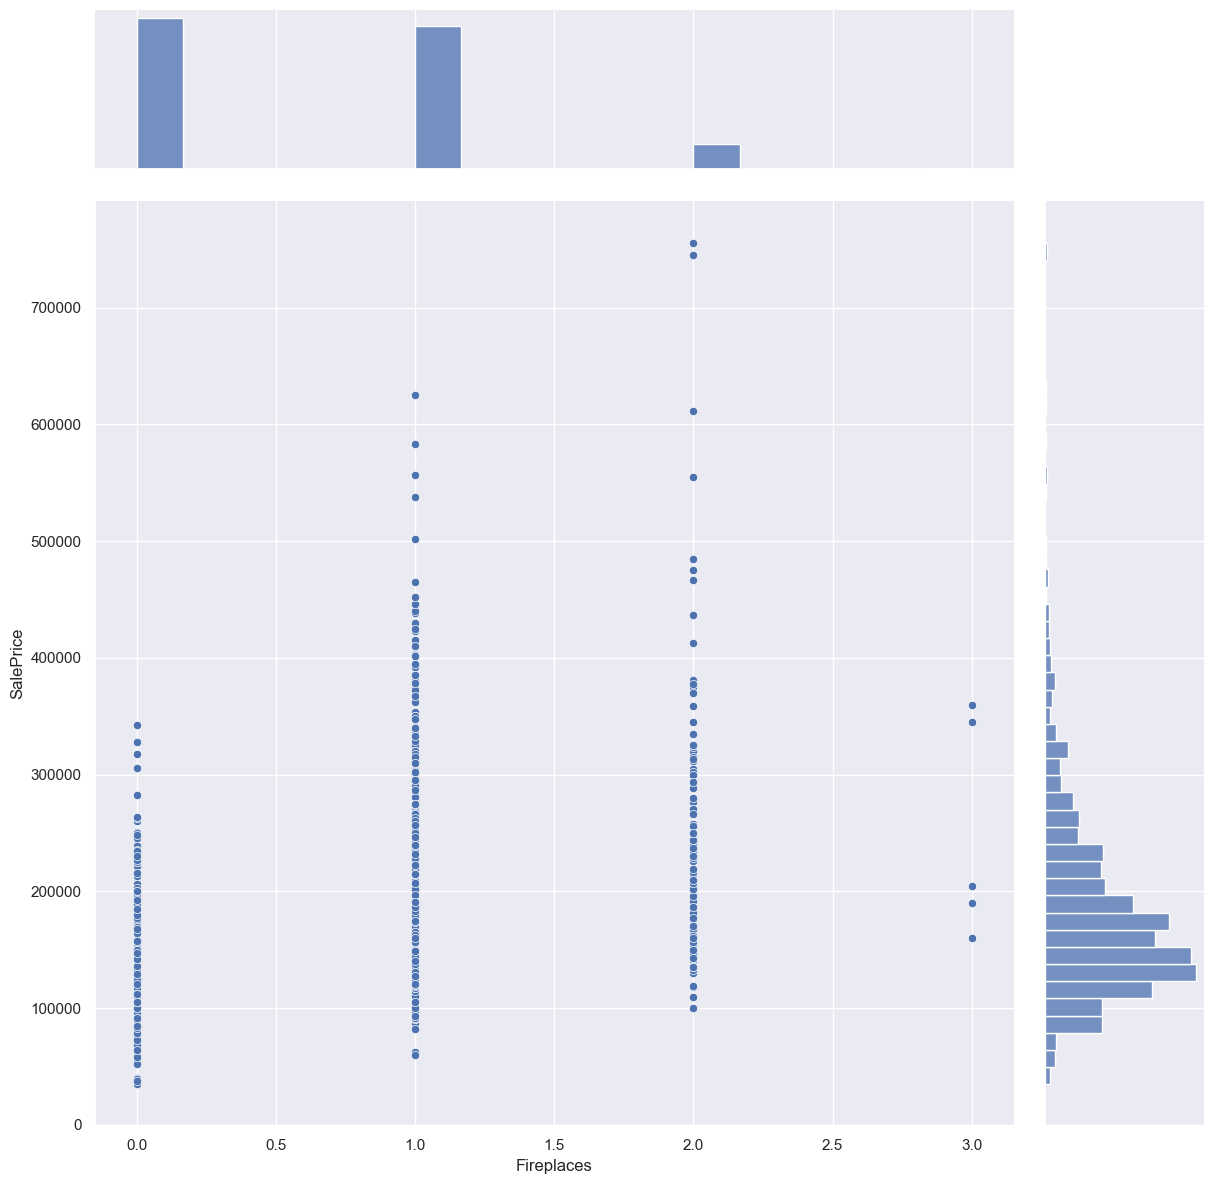

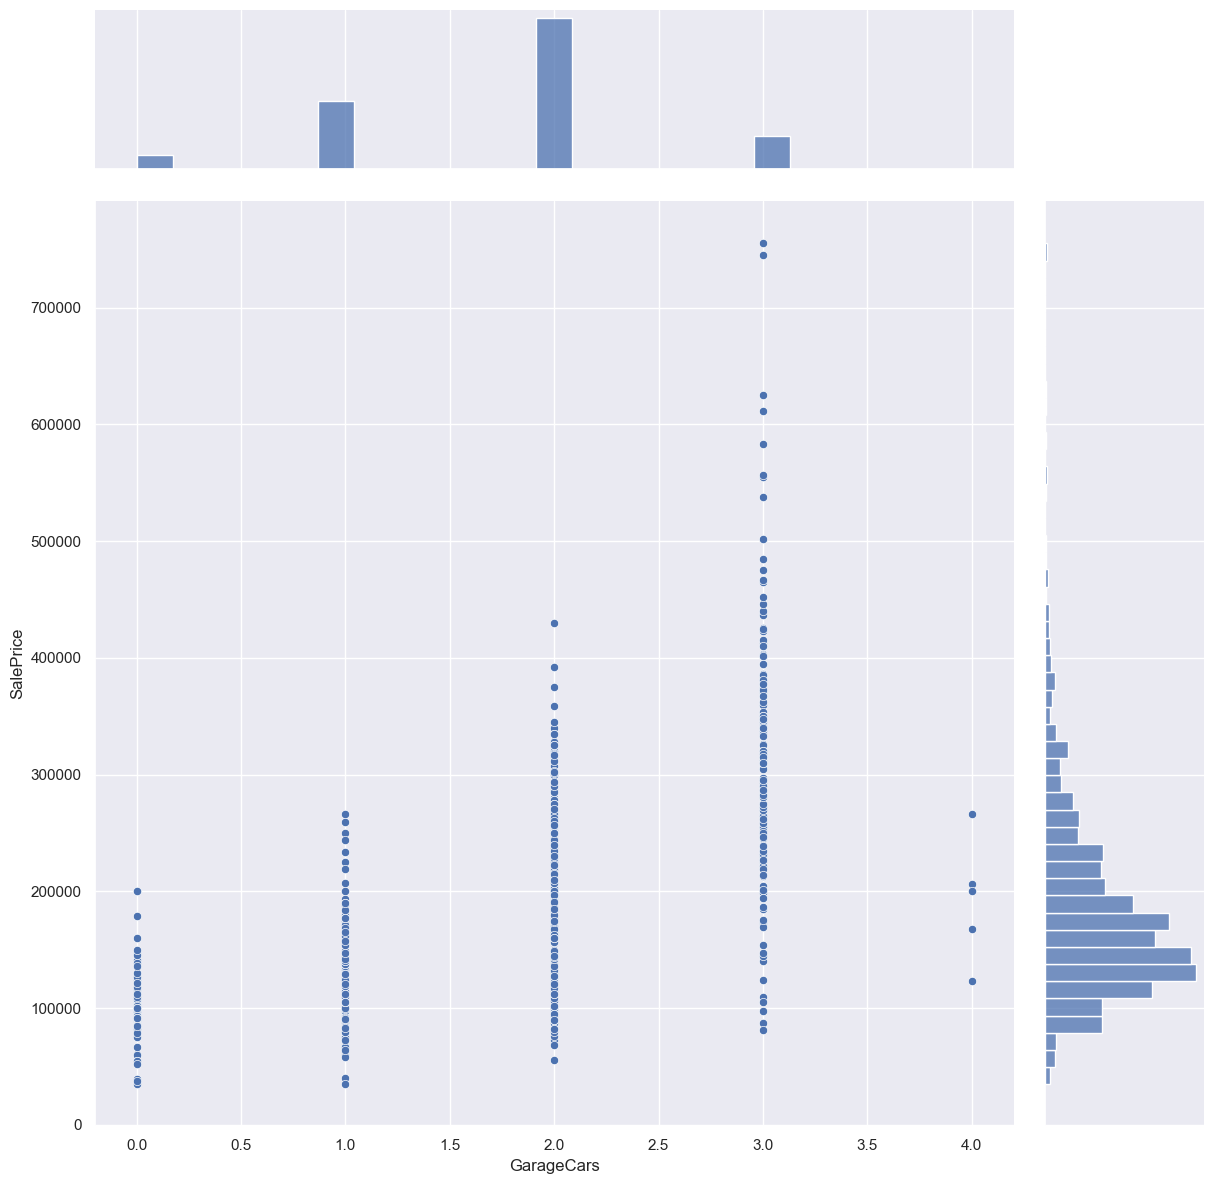

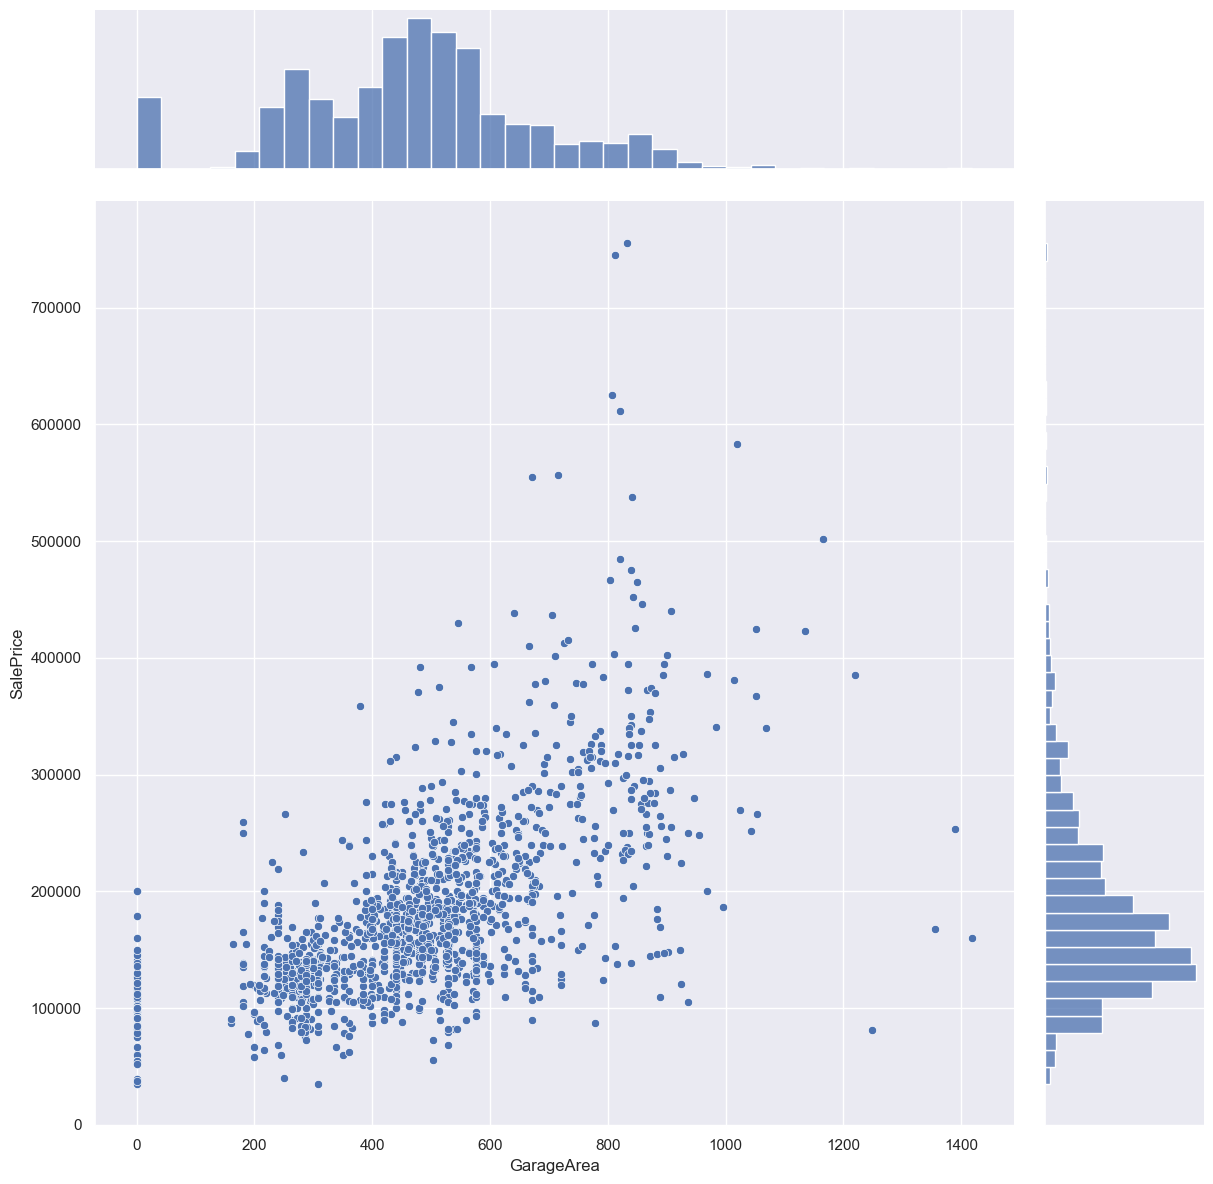

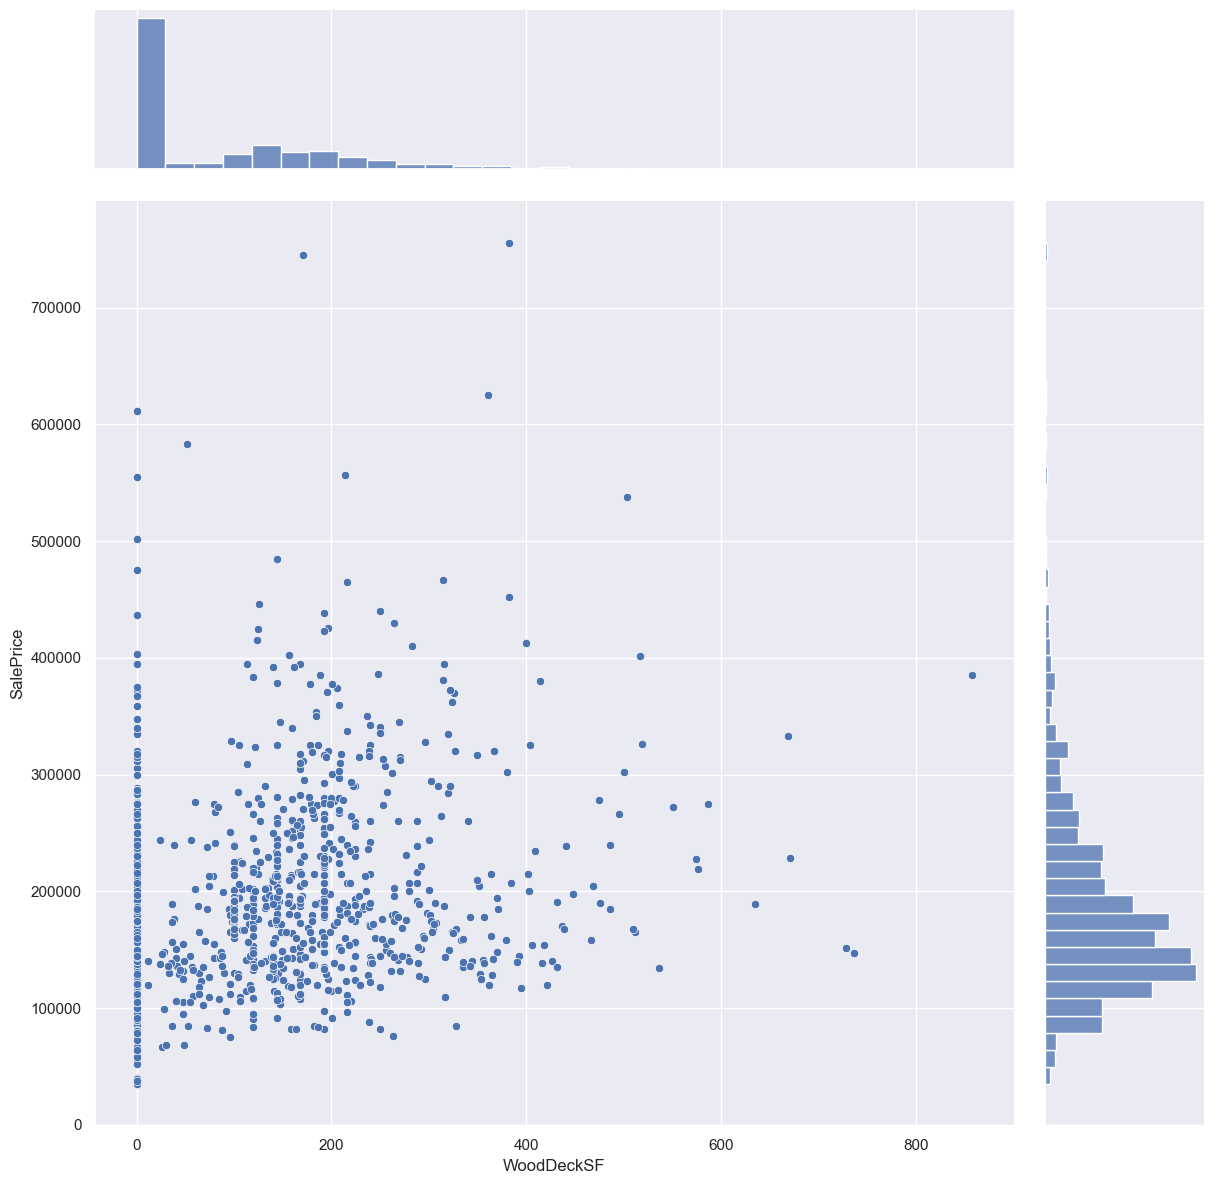

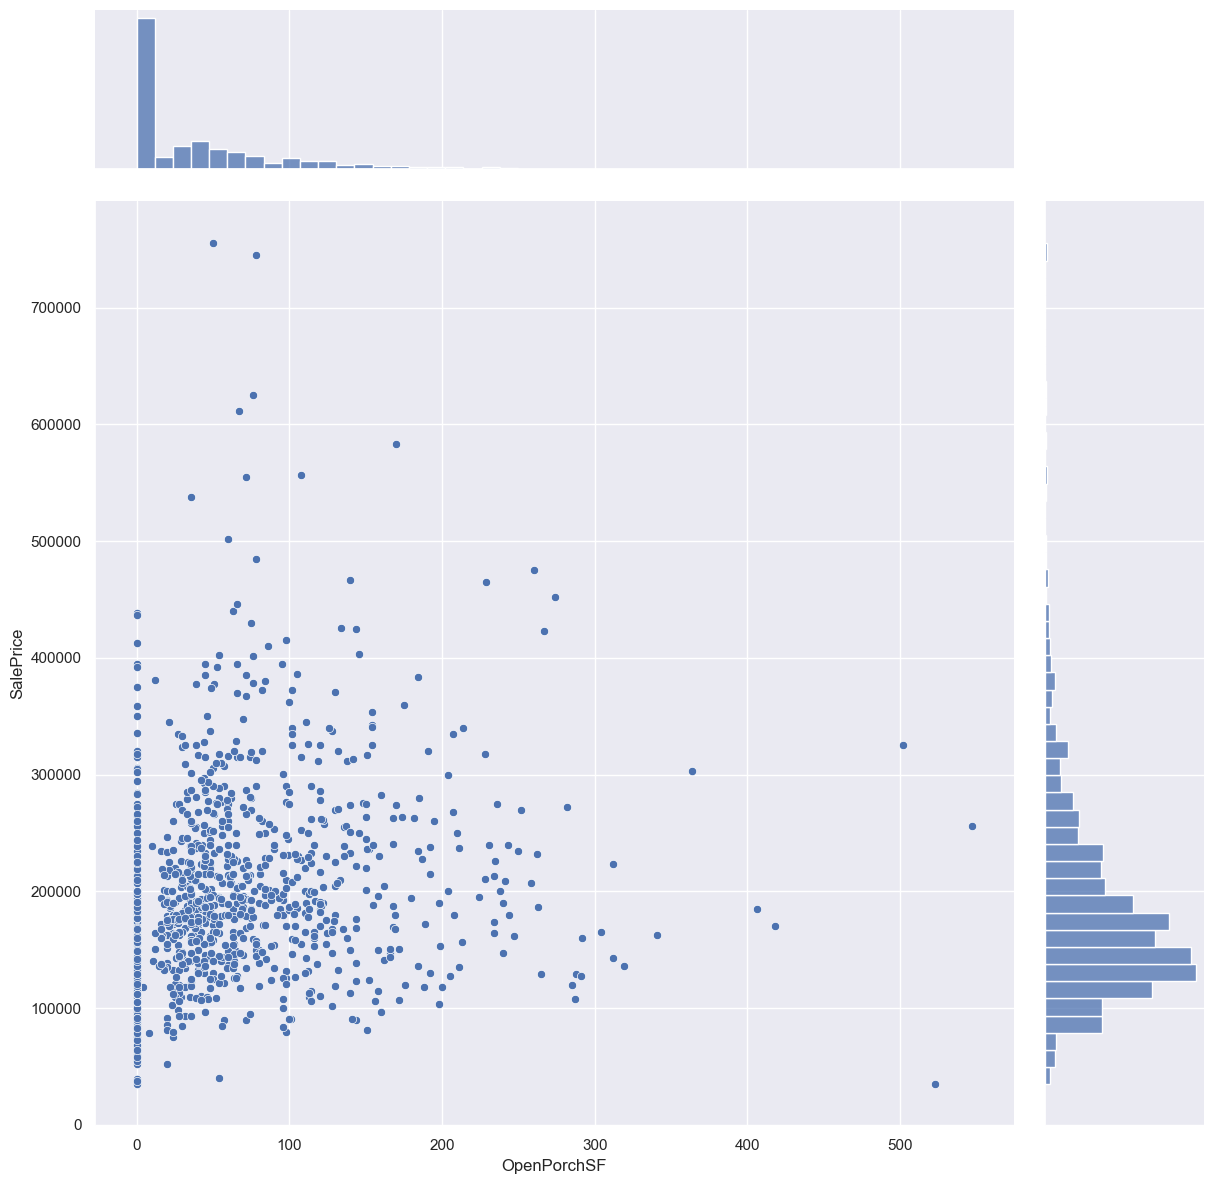

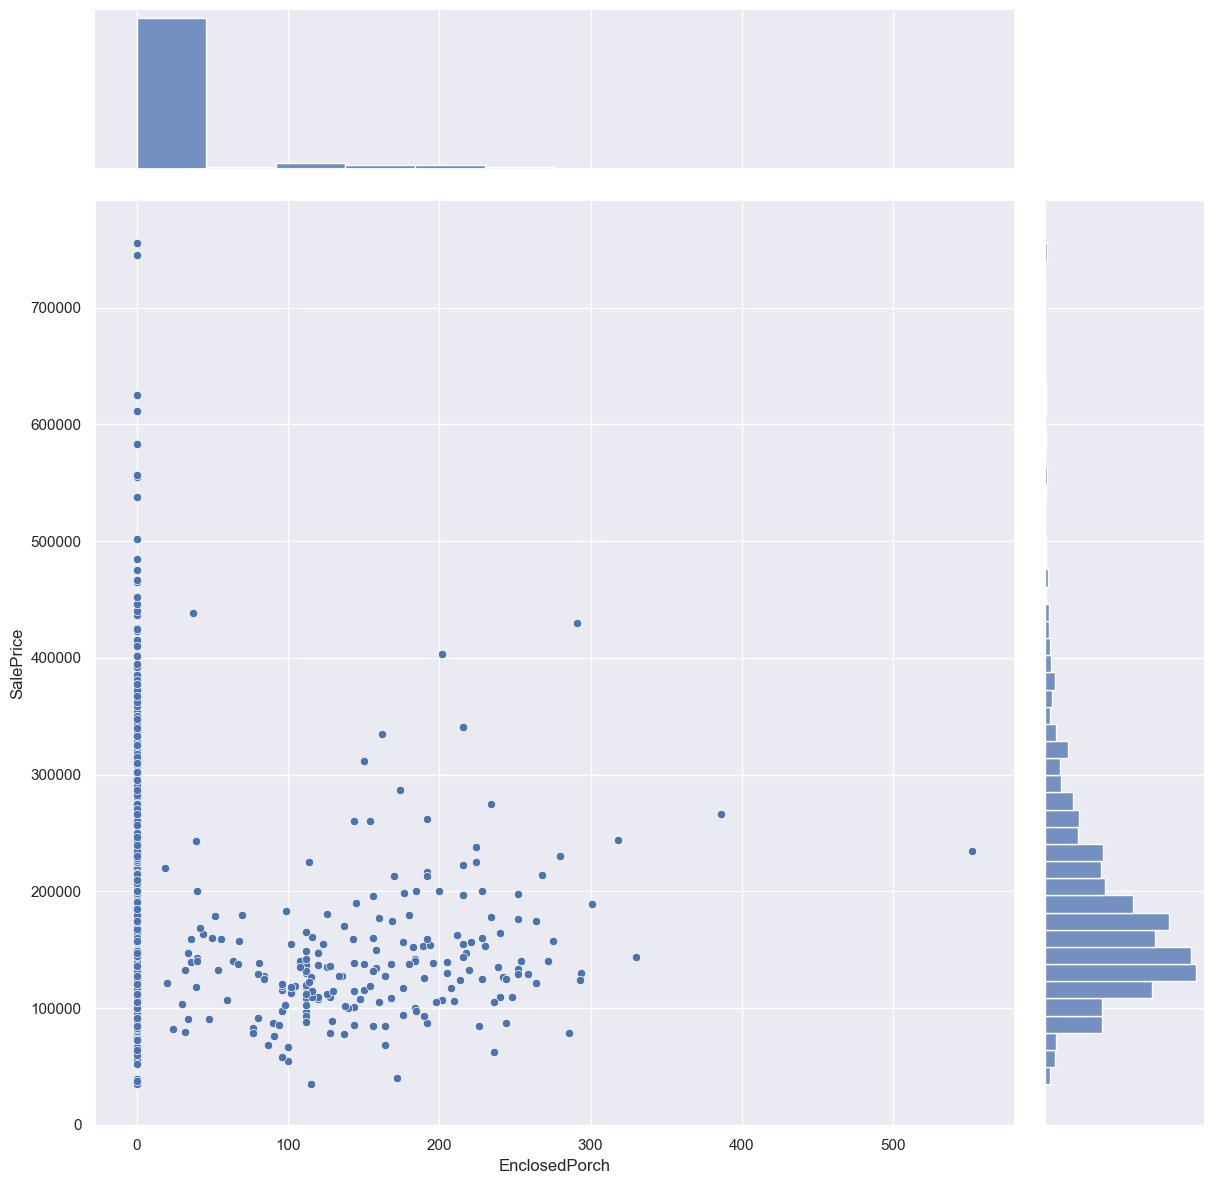

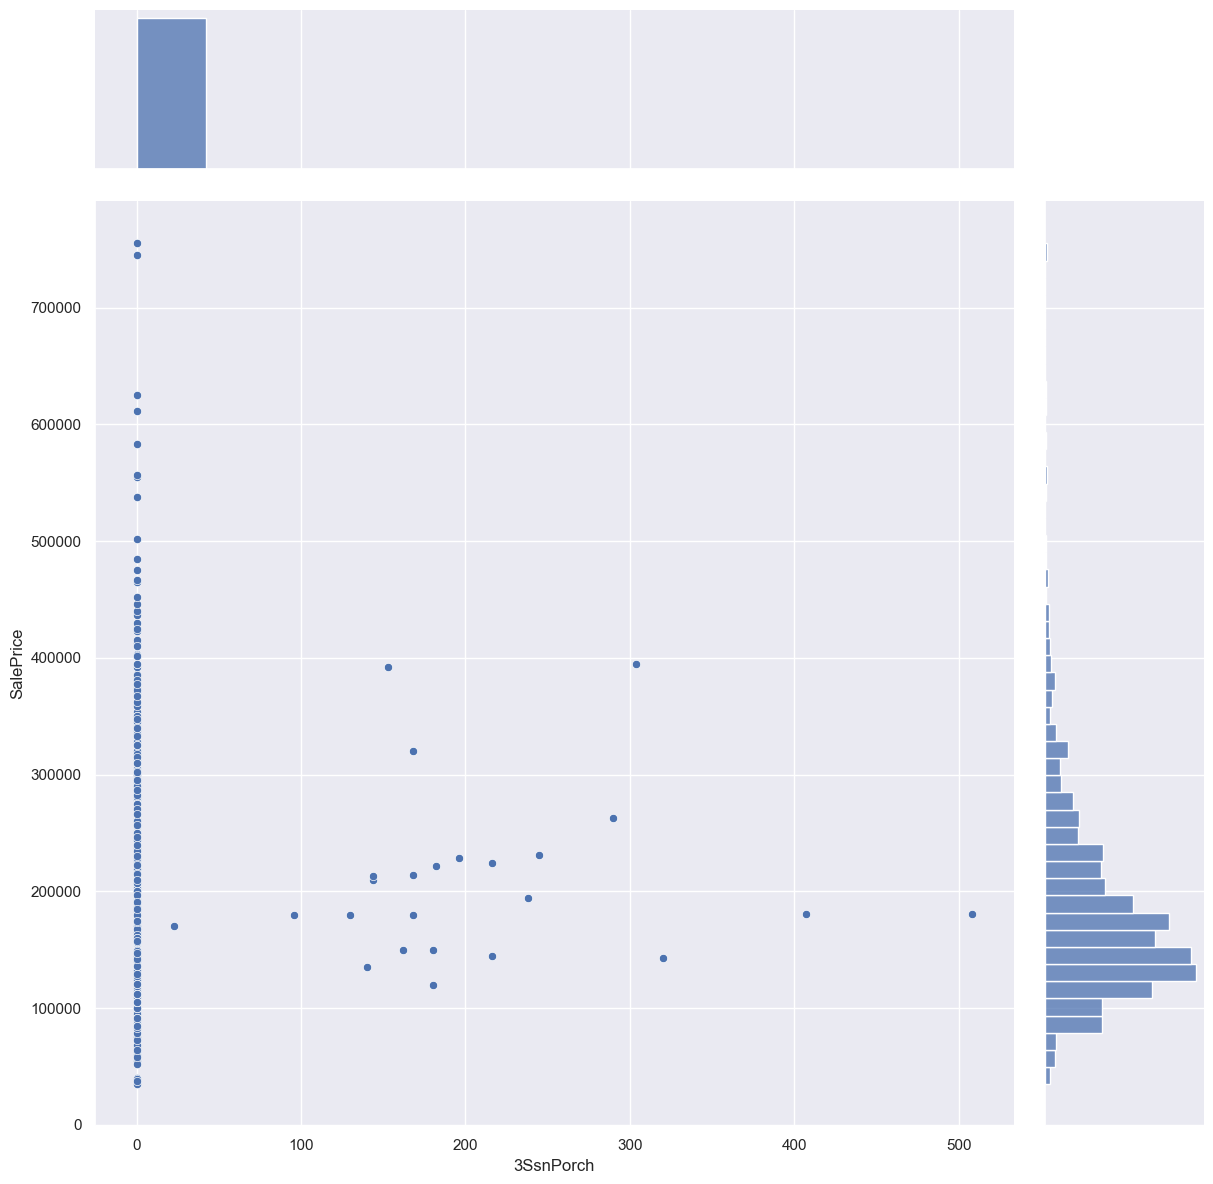

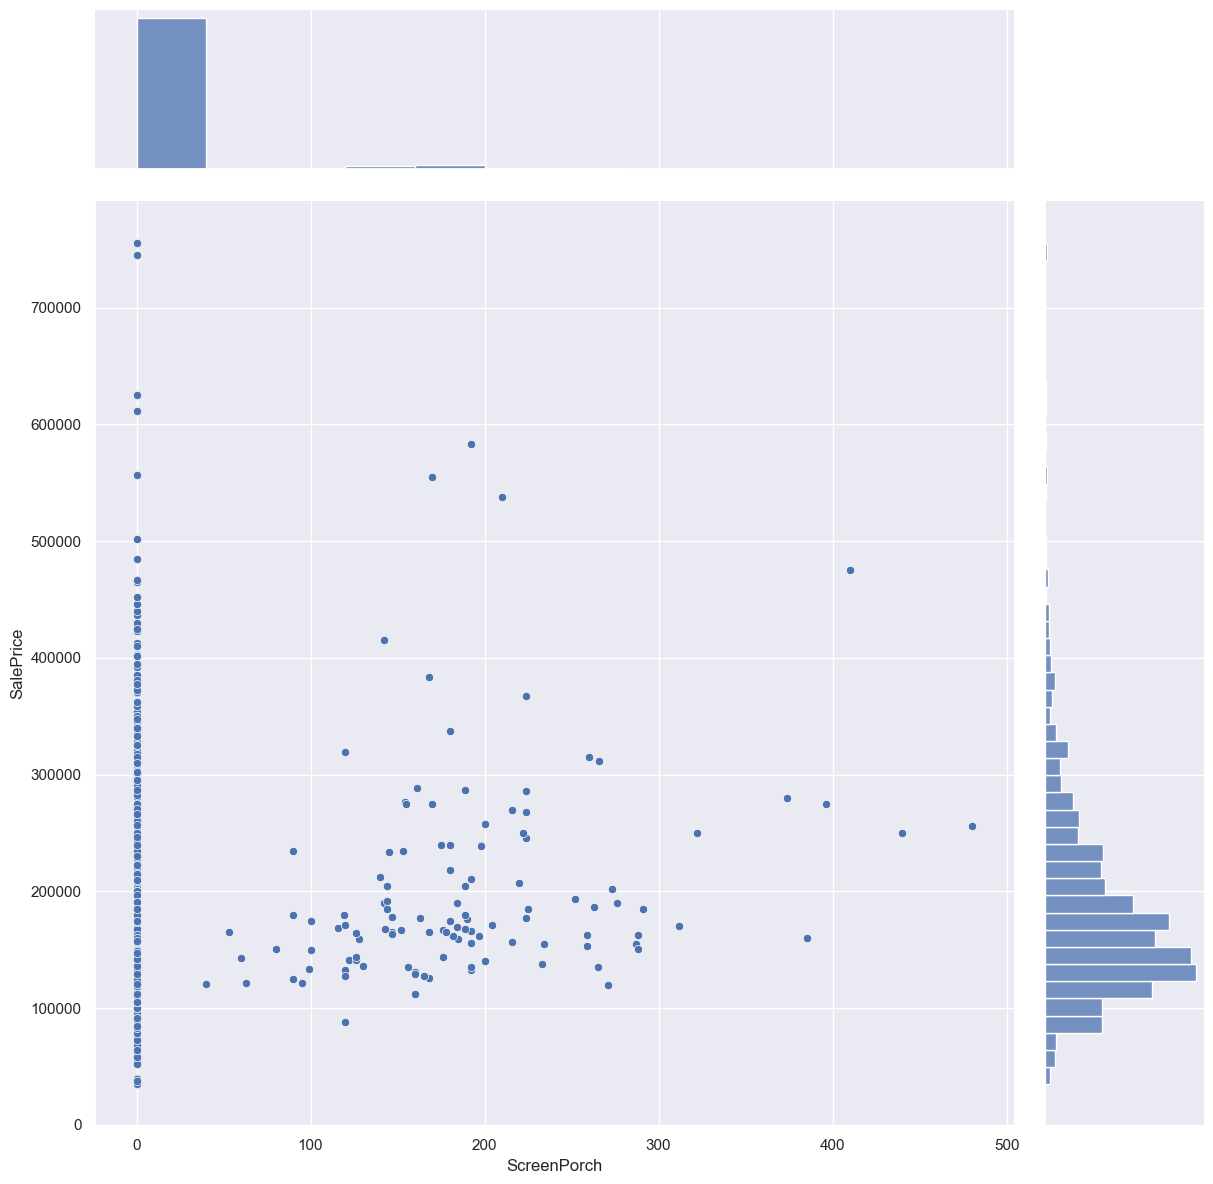

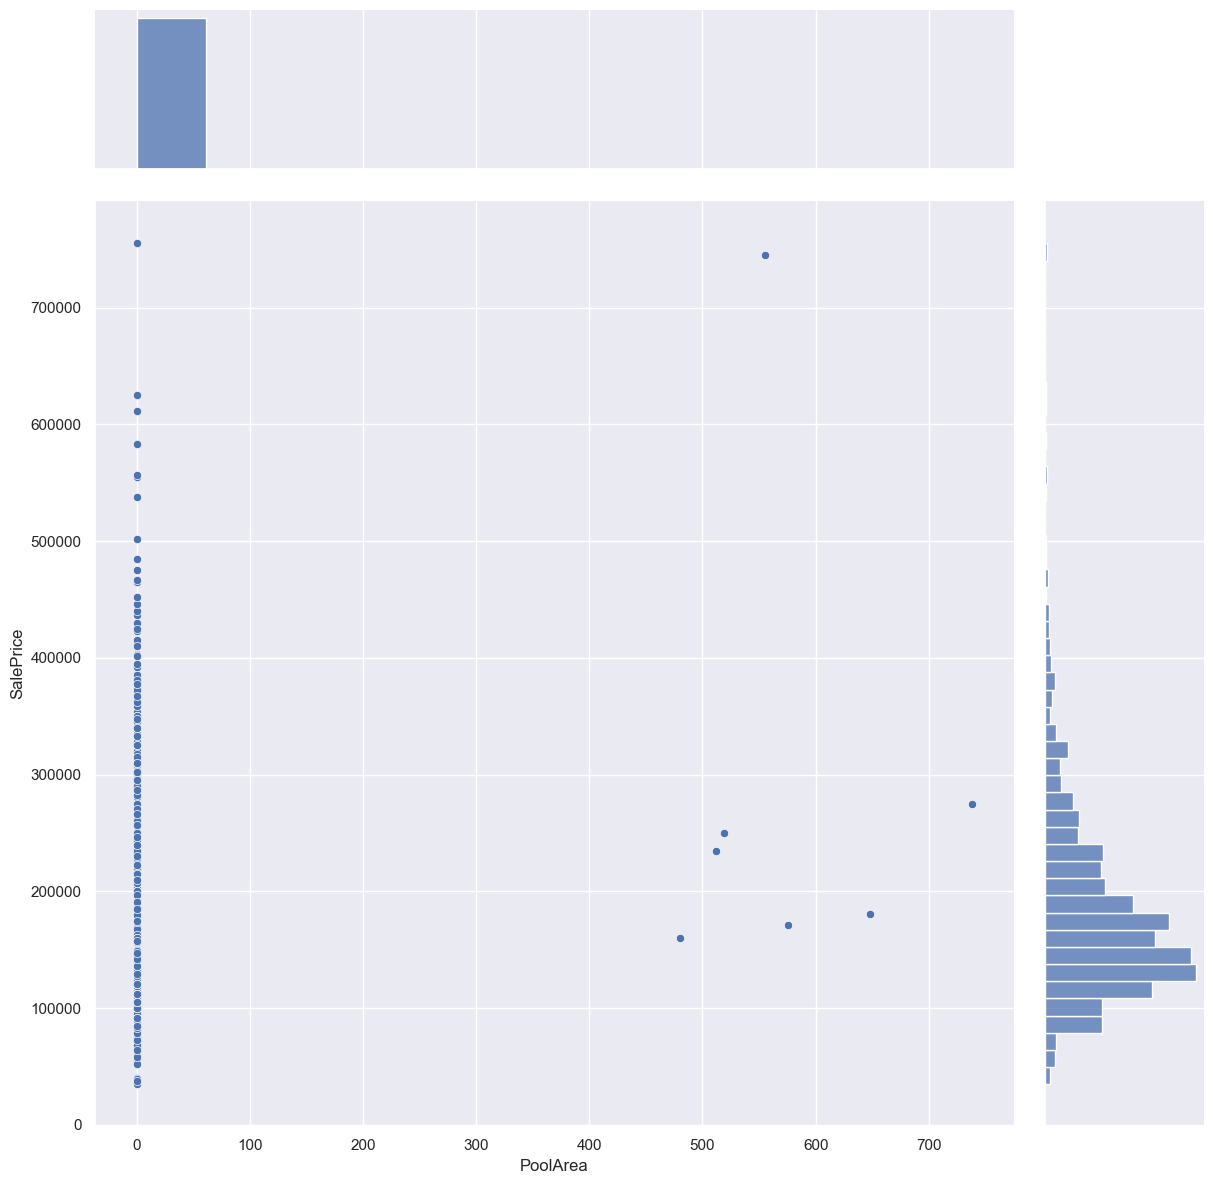

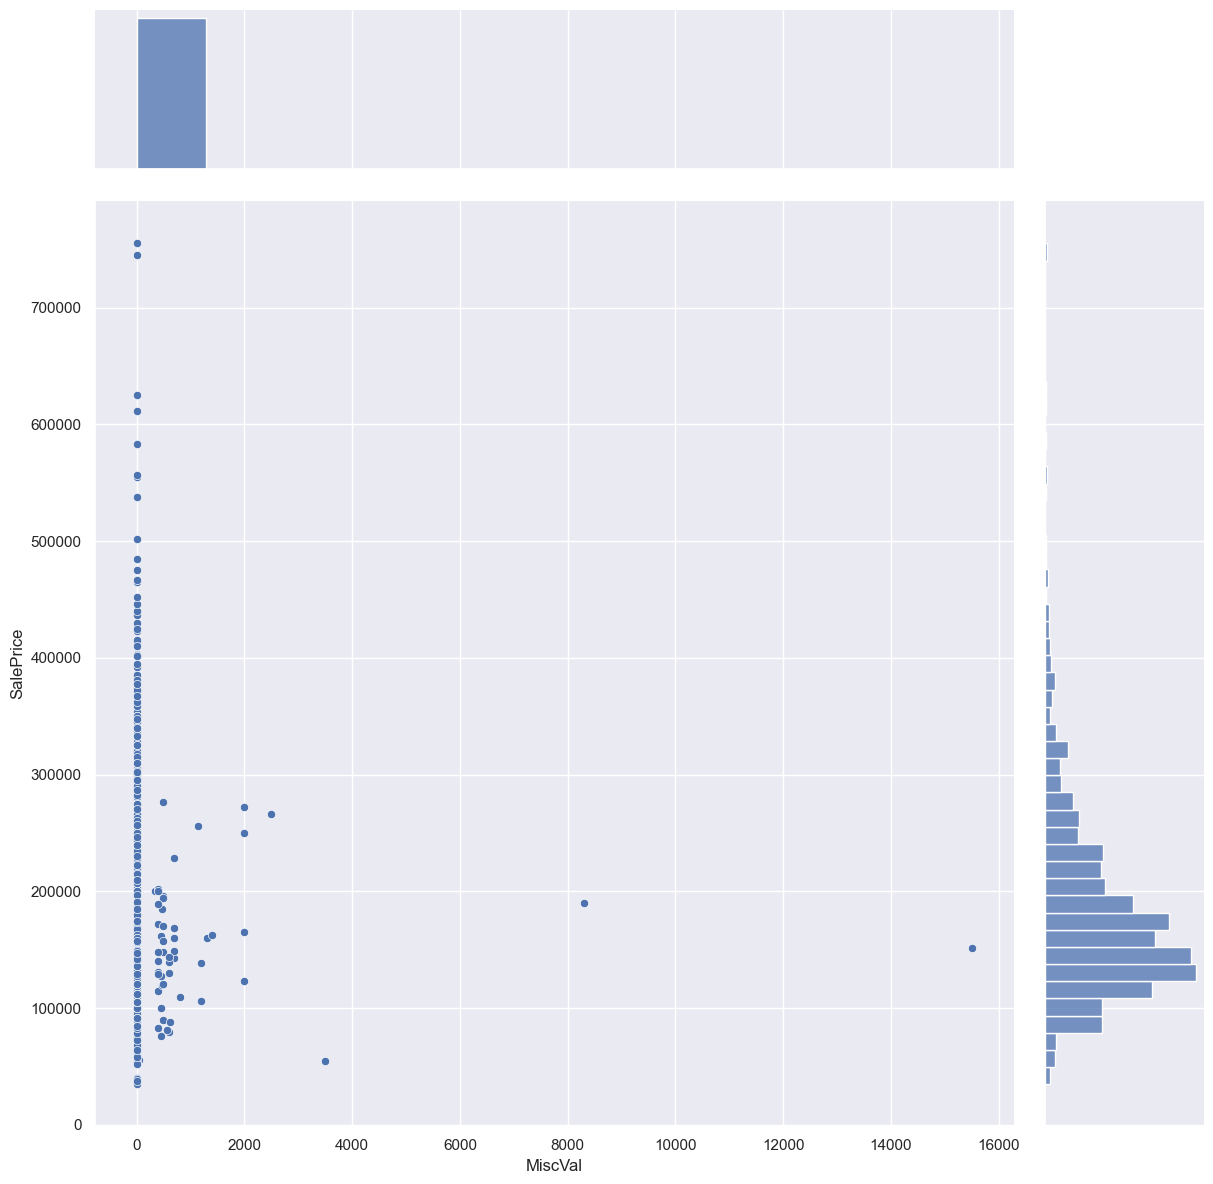

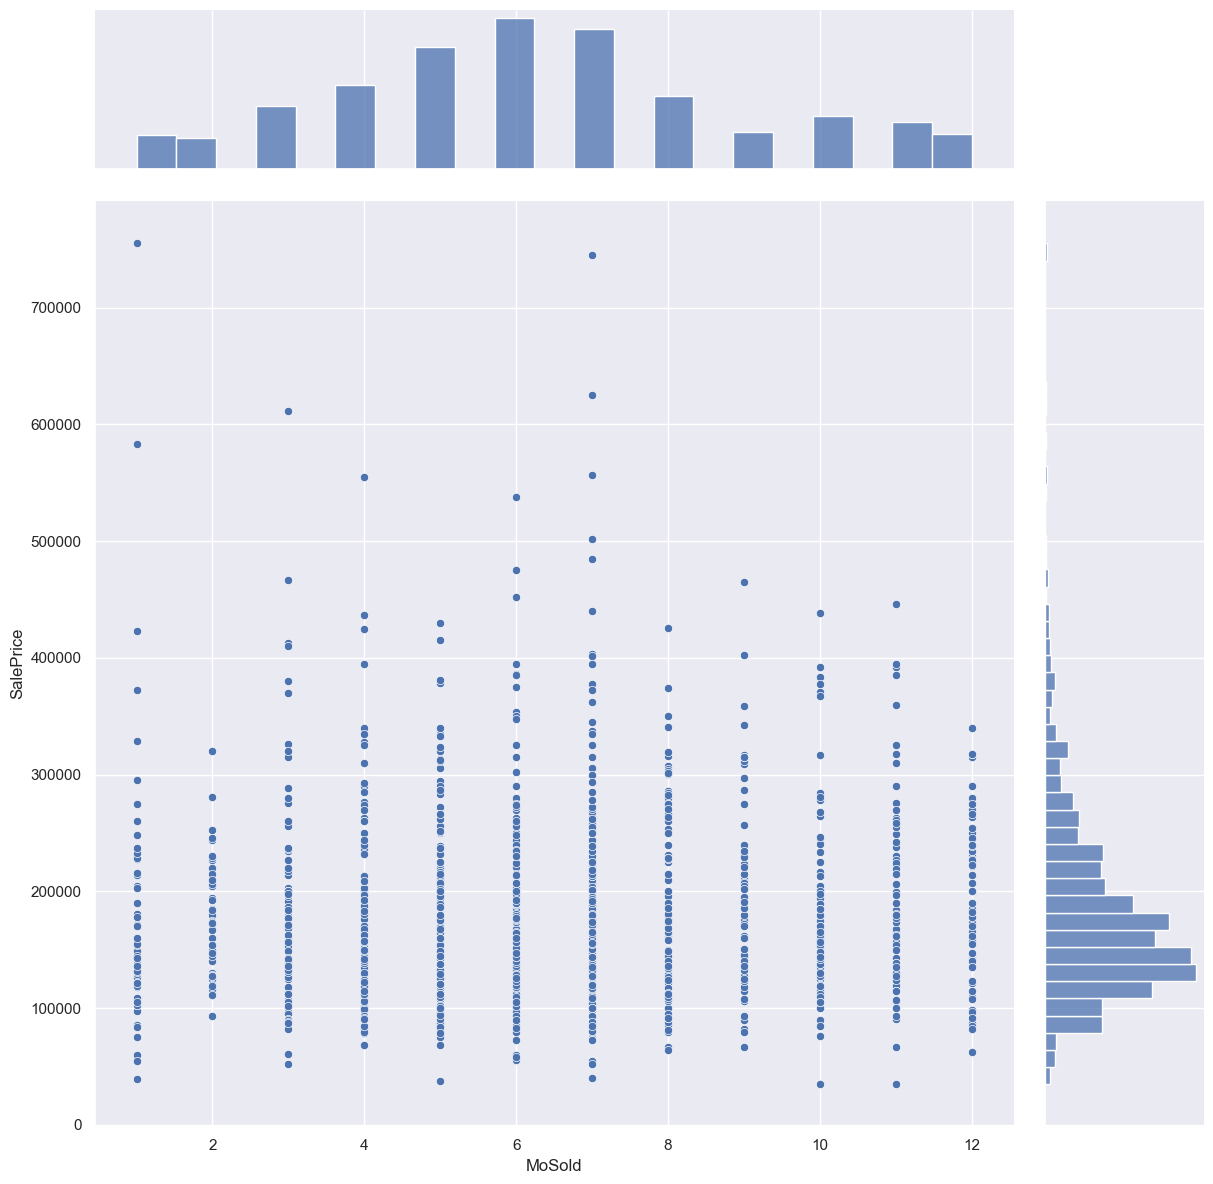

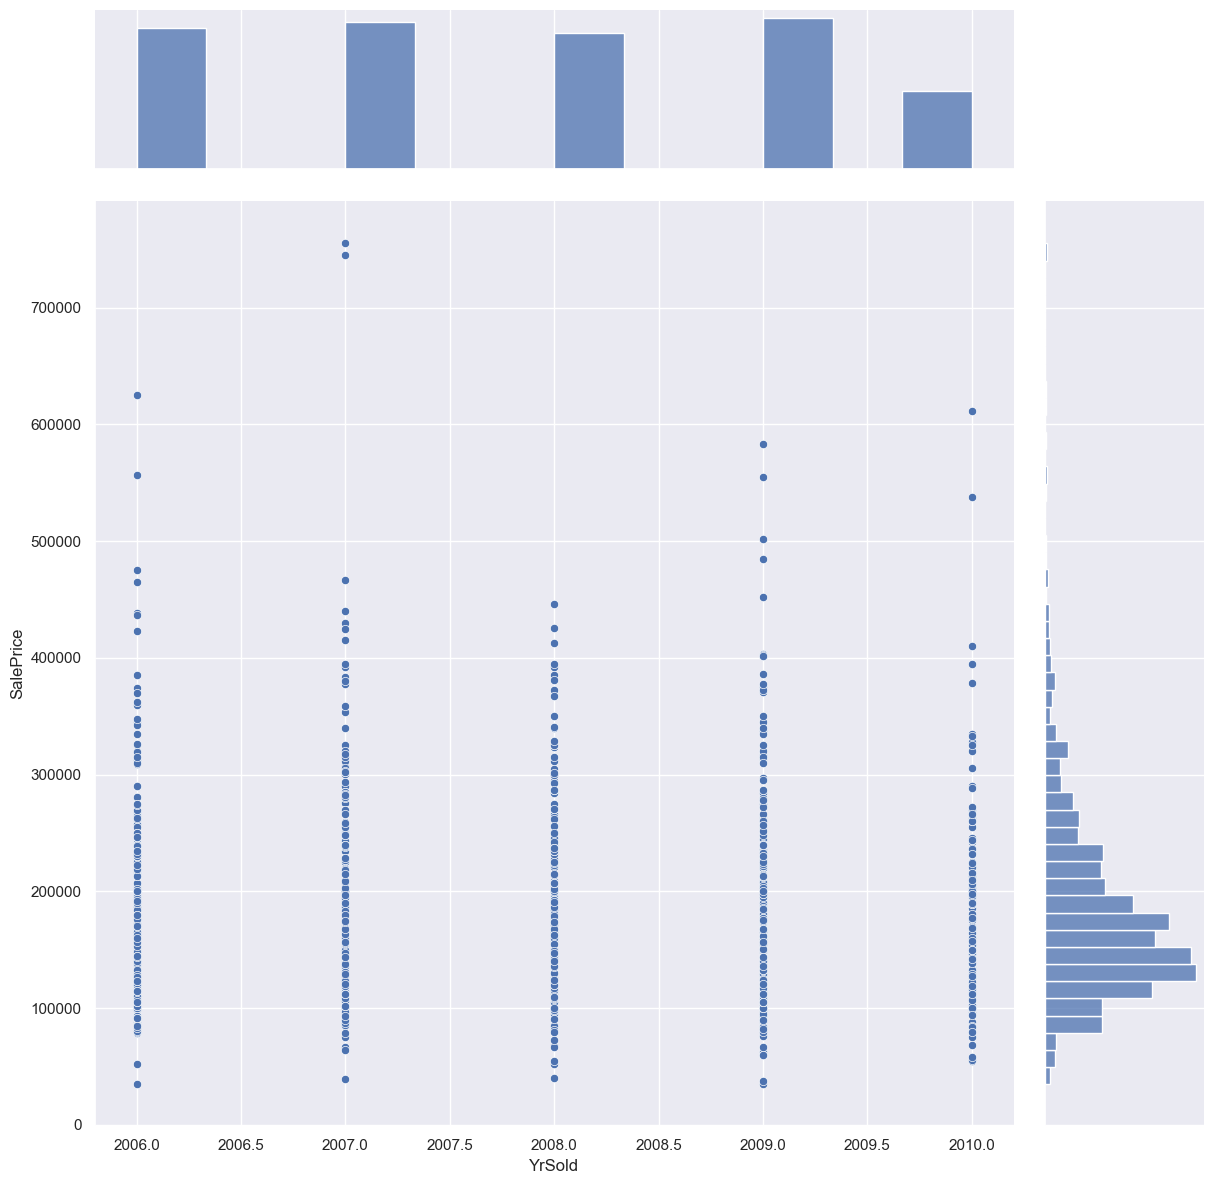

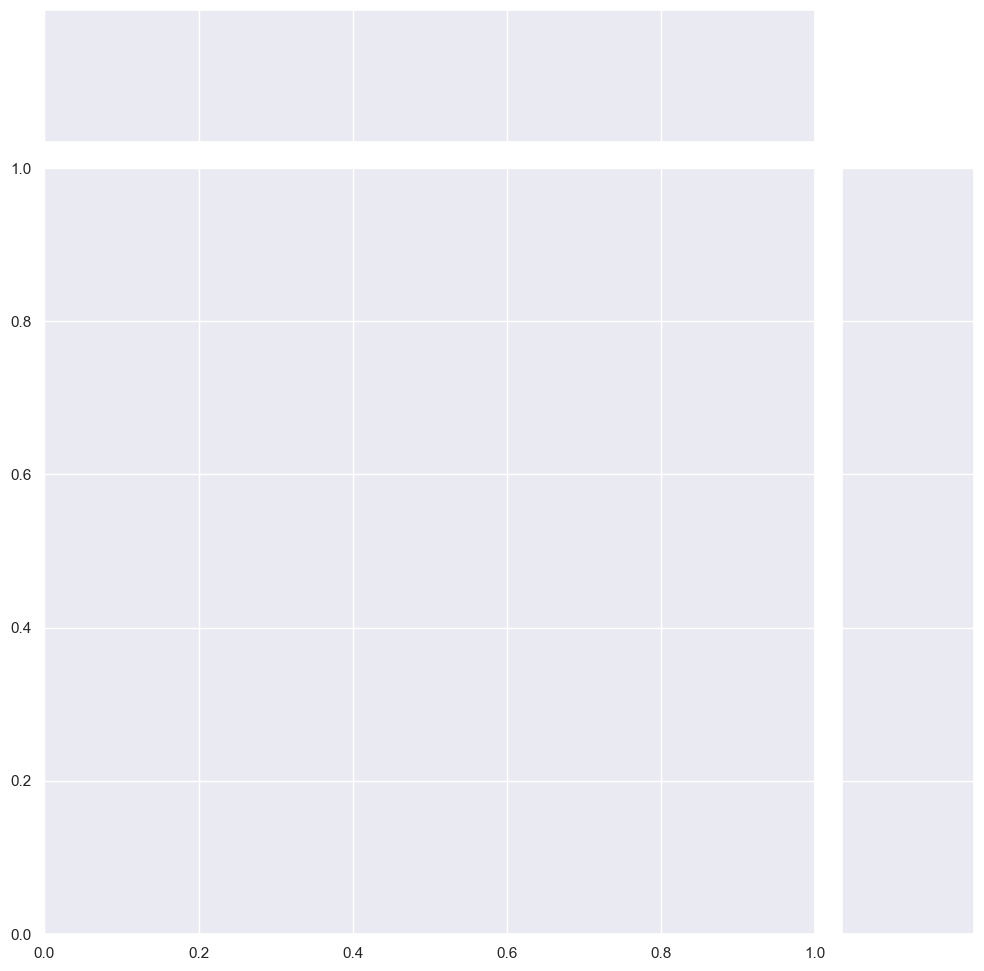

In [32]:


for var in clean_trains:
    if var != 'SalePirce':
        holder = pd.DataFrame(clean_trains[var])
        join = pd.concat([sp, holder], axis = 1).reindex(sp.index)
        sb.jointplot(data = join, x = var, y = 'SalePrice',height = 12)
        counter += 1
    